# Observing the Data set


In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats




from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("weather_classification_data.csv")
data 

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

In [3]:
data.rename(columns={
    'Precipitation (%)': 'Precipitation_percent',
    'Atmospheric Pressure': 'Atmospheric_Pressure',
    'Visibility (km)': 'Visibility_km',
    'Cloud Cover': 'Cloud_Cover',
    'Weather Type': 'Weather_Type',
    'Wind Speed': 'Wind_Speed',
    'UV Index': 'UV_Index'
    
}, inplace=True)

In [4]:
data.shape

(13200, 11)

In [5]:
data.head()

Temperature  Humidity  Wind_Speed  Precipitation_percent    Cloud_Cover  \
0         14.0        73         9.5                   82.0  partly cloudy   
1         39.0        96         8.5                   71.0  partly cloudy   
2         30.0        64         7.0                   16.0          clear   
3         38.0        83         1.5                   82.0          clear   
4         27.0        74        17.0                   66.0       overcast   

   Atmospheric_Pressure  UV_Index  Season  Visibility_km  Location  \
0               1010.82         2  Winter            3.5    inland   
1               1011.43         7  Spring           10.0    inland   
2               1018.72         5  Spring            5.5  mountain   
3               1026.25         7  Spring            1.0   coastal   
4                990.67         1  Winter            2.5  mountain   

  Weather_Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [6]:
data.tail()


Temperature  Humidity  Wind_Speed  Precipitation_percent Cloud_Cover  \
13195         10.0        74        14.5                   71.0    overcast   
13196         -1.0        76         3.5                   23.0      cloudy   
13197         30.0        77         5.5                   28.0    overcast   
13198          3.0        76        10.0                   94.0    overcast   
13199         -5.0        38         0.0                   92.0    overcast   

       Atmospheric_Pressure  UV_Index  Season  Visibility_km  Location  \
13195               1003.15         1  Summer            1.0  mountain   
13196               1067.23         1  Winter            6.0   coastal   
13197               1012.69         3  Autumn            9.0   coastal   
13198                984.27         0  Winter            2.0    inland   
13199               1015.37         5  Autumn           10.0  mountain   

      Weather_Type  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy

In [7]:
data.isna().sum()

Temperature              0
Humidity                 0
Wind_Speed               0
Precipitation_percent    0
Cloud_Cover              0
Atmospheric_Pressure     0
UV_Index                 0
Season                   0
Visibility_km            0
Location                 0
Weather_Type             0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            13200 non-null  float64
 1   Humidity               13200 non-null  int64  
 2   Wind_Speed             13200 non-null  float64
 3   Precipitation_percent  13200 non-null  float64
 4   Cloud_Cover            13200 non-null  object 
 5   Atmospheric_Pressure   13200 non-null  float64
 6   UV_Index               13200 non-null  int64  
 7   Season                 13200 non-null  object 
 8   Visibility_km          13200 non-null  float64
 9   Location               13200 non-null  object 
 10  Weather_Type           13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
data.describe()

Temperature      Humidity    Wind_Speed  Precipitation_percent  \
count  13200.000000  13200.000000  13200.000000           13200.000000   
mean      19.127576     68.710833      9.832197              53.644394   
std       17.386327     20.194248      6.908704              31.946541   
min      -25.000000     20.000000      0.000000               0.000000   
25%        4.000000     57.000000      5.000000              19.000000   
50%       21.000000     70.000000      9.000000              58.000000   
75%       31.000000     84.000000     13.500000              82.000000   
max      109.000000    109.000000     48.500000             109.000000   

       Atmospheric_Pressure      UV_Index  Visibility_km  
count          13200.000000  13200.000000   13200.000000  
mean            1005.827896      4.005758       5.462917  
std               37.199589      3.856600       3.371499  
min              800.120000      0.000000       0.000000  
25%              994.800000      1.000000       3.000000  
50%             1007.650000      3.000000       5.000000  
75%             1016.772500      7.000000       7.500000  
max             1199.210000     14.000000      20.000000

In [11]:
data.dtypes

Temperature              float64
Humidity                   int64
Wind_Speed               float64
Precipitation_percent    float64
Cloud_Cover               object
Atmospheric_Pressure     float64
UV_Index                   int64
Season                    object
Visibility_km            float64
Location                  object
Weather_Type              object
dtype: object

In [12]:
data.describe(include=['object', 'category'])

Cloud_Cover  Season Location Weather_Type
count        13200   13200    13200        13200
unique           4       4        3            4
top       overcast  Winter   inland        Rainy
freq          6090    5610     4816         3300

In [13]:
categorical_variables = ['Season','Cloud_Cover','Location','Weather_Type']
def level_counter (df,vec):
    for var in categorical_variables:
        print(f"Value counts for {var}:")
        print(df[var].value_counts())
        print()
        
level_counter(data, categorical_variables)  


Value counts for Season:
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: Season, dtype: int64

Value counts for Cloud_Cover:
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: Cloud_Cover, dtype: int64

Value counts for Location:
inland      4816
mountain    4813
coastal     3571
Name: Location, dtype: int64

Value counts for Weather_Type:
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: Weather_Type, dtype: int64



## Our response variable appears to be precisely balanced at every level, as can be shown. 


In [14]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns =data.select_dtypes(include=['number']).columns

print("Numerical",numerical_columns)
print("Categorical",categorical_columns)

Numerical Index(['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent',
       'Atmospheric_Pressure', 'UV_Index', 'Visibility_km'],
      dtype='object')
Categorical Index(['Cloud_Cover', 'Season', 'Location', 'Weather_Type'], dtype='object')


## Splitting the data set (without encoding )

In [15]:
Y  = data['Weather_Type']
X = data.drop('Weather_Type',axis=1)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [17]:
X_train.head()

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
9645          32.0        64         6.0                   86.0   
8002          34.0        79        12.0                   95.0   
6329          -4.0        83        37.5                   72.0   
11103         17.0        66        19.5                   71.0   
3600          -3.0        86         3.0                   82.0   

         Cloud_Cover  Atmospheric_Pressure  UV_Index  Season  Visibility_km  \
9645        overcast               1007.86         0  Autumn            3.0   
8002        overcast               1000.16         2  Spring            3.5   
6329   partly cloudy                991.22         3  Winter            1.0   
11103       overcast               1017.39         0  Spring            4.0   
3600        overcast                996.59         1  Winter            4.0   

       Location  
9645    coastal  
8002     inland  
6329     inland  
11103  mountain  
3600   mountain

In [18]:
X_train[numerical_columns]

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
9645          32.0        64         6.0                   86.0   
8002          34.0        79        12.0                   95.0   
6329          -4.0        83        37.5                   72.0   
11103         17.0        66        19.5                   71.0   
3600          -3.0        86         3.0                   82.0   
...            ...       ...         ...                    ...   
11633          3.0        68         2.5                   93.0   
1344          24.0        98        11.5                   63.0   
12815         24.0        73         7.5                   82.0   
7293          19.0        33        14.0                   18.0   
1289          27.0        63         6.0                   80.0   

       Atmospheric_Pressure  UV_Index  Visibility_km  
9645                1007.86         0            3.0  
8002                1000.16         2            3.5  
6329                 991.22         3            1.0  
11103               1017.39         0            4.0  
3600                 996.59         1            4.0  
...                     ...       ...            ...  
11633                983.14         1            1.0  
1344                1017.39         2            1.5  
12815               1015.08         3            4.0  
7293                1091.81         6           10.5  
1289                1005.80         0            3.5  

[10560 rows x 7 columns]

In [19]:
train_set = pd.concat([X_train,Y_train],axis=1)
train_set

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
9645          32.0        64         6.0                   86.0   
8002          34.0        79        12.0                   95.0   
6329          -4.0        83        37.5                   72.0   
11103         17.0        66        19.5                   71.0   
3600          -3.0        86         3.0                   82.0   
...            ...       ...         ...                    ...   
11633          3.0        68         2.5                   93.0   
1344          24.0        98        11.5                   63.0   
12815         24.0        73         7.5                   82.0   
7293          19.0        33        14.0                   18.0   
1289          27.0        63         6.0                   80.0   

         Cloud_Cover  Atmospheric_Pressure  UV_Index  Season  Visibility_km  \
9645        overcast               1007.86         0  Autumn            3.0   
8002        overcast               1000.16         2  Spring            3.5   
6329   partly cloudy                991.22         3  Winter            1.0   
11103       overcast               1017.39         0  Spring            4.0   
3600        overcast                996.59         1  Winter            4.0   
...              ...                   ...       ...     ...            ...   
11633       overcast                983.14         1  Winter            1.0   
1344   partly cloudy               1017.39         2  Autumn            1.5   
12815       overcast               1015.08         3  Autumn            4.0   
7293          cloudy               1091.81         6  Winter           10.5   
1289        overcast               1005.80         0  Winter            3.5   

       Location Weather_Type  
9645    coastal        Rainy  
8002     inland        Rainy  
6329     inland        Snowy  
11103  mountain        Rainy  
3600   mountain        Snowy  
...         ...          ...  
11633    inland        Snowy  
1344     inland        Rainy  
12815    inland        Rainy  
7293   mountain       Cloudy  
1289    coastal        Rainy  

[10560 rows x 11 columns]

In [20]:
#train_set.to_csv('train_set_no_encode.csv', index=False)

In [21]:
test_set = pd.concat([X_test,Y_test],axis=1)
test_set

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
11923         13.0        75         9.0                   58.0   
2331           3.0        73         9.5                   59.0   
217           18.0        74         0.5                   39.0   
1760          38.0        88        19.5                   85.0   
3963          24.0        38         4.5                   15.0   
...            ...       ...         ...                    ...   
9950          -5.0        97        10.0                   78.0   
4515          24.0        56         8.5                   48.0   
1996          12.0        89         6.5                   86.0   
1457          28.0        62         6.5                   69.0   
12025         29.0        45         3.5                    1.0   

         Cloud_Cover  Atmospheric_Pressure  UV_Index  Season  Visibility_km  \
11923  partly cloudy               1000.52         1  Summer            3.0   
2331        overcast                983.56         0  Winter            2.5   
217         overcast               1007.53         1  Autumn            8.5   
1760   partly cloudy               1009.03         0  Spring            4.5   
3963   partly cloudy               1029.37         9  Spring            7.0   
...              ...                   ...       ...     ...            ...   
9950        overcast                980.14         1  Winter            1.5   
4515        overcast               1012.30         4  Autumn            7.0   
1996        overcast                992.27         2  Summer            1.5   
1457        overcast                994.82         1  Winter            3.0   
12025          clear               1029.92        11  Autumn            8.5   

       Location Weather_Type  
11923    inland        Rainy  
2331     inland        Snowy  
217    mountain       Cloudy  
1760     inland       Cloudy  
3963   mountain        Sunny  
...         ...          ...  
9950     inland        Snowy  
4515    coastal       Cloudy  
1996    coastal        Rainy  
1457   mountain        Rainy  
12025   coastal        Sunny  

[2640 rows x 11 columns]

# Encoding the categorical variables 

In [22]:
data_encoded = data.copy()

In [23]:
data_encoded

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
0             14.0        73         9.5                   82.0   
1             39.0        96         8.5                   71.0   
2             30.0        64         7.0                   16.0   
3             38.0        83         1.5                   82.0   
4             27.0        74        17.0                   66.0   
...            ...       ...         ...                    ...   
13195         10.0        74        14.5                   71.0   
13196         -1.0        76         3.5                   23.0   
13197         30.0        77         5.5                   28.0   
13198          3.0        76        10.0                   94.0   
13199         -5.0        38         0.0                   92.0   

         Cloud_Cover  Atmospheric_Pressure  UV_Index  Season  Visibility_km  \
0      partly cloudy               1010.82         2  Winter            3.5   
1      partly cloudy               1011.43         7  Spring           10.0   
2              clear               1018.72         5  Spring            5.5   
3              clear               1026.25         7  Spring            1.0   
4           overcast                990.67         1  Winter            2.5   
...              ...                   ...       ...     ...            ...   
13195       overcast               1003.15         1  Summer            1.0   
13196         cloudy               1067.23         1  Winter            6.0   
13197       overcast               1012.69         3  Autumn            9.0   
13198       overcast                984.27         0  Winter            2.0   
13199       overcast               1015.37         5  Autumn           10.0   

       Location Weather_Type  
0        inland        Rainy  
1        inland       Cloudy  
2      mountain        Sunny  
3       coastal        Sunny  
4      mountain        Rainy  
...         ...          ...  
13195  mountain        Rainy  
13196   coastal        Snowy  
13197   coastal       Cloudy  
13198    inland        Snowy  
13199  mountain        Rainy  

[13200 rows x 11 columns]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Weather_Type'])
data_encoded['Weather_Type'] = le.transform(data_encoded['Weather_Type'])

In [25]:
for i, class_ in enumerate(le.classes_):
    print(f'{class_} is encoded as {i}')
    
inverse_transformed = list(le.inverse_transform([0, 1, 2, 3]))
print("Inverse Transformed:", inverse_transformed)

Cloudy is encoded as 0
Rainy is encoded as 1
Snowy is encoded as 2
Sunny is encoded as 3
Inverse Transformed: ['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [26]:
data_encoded_plot =data_encoded.copy()

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
columns_to_encode = ['Season', 'Cloud_Cover', 'Location']

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_encoded [columns_to_encode])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns_to_encode))
data_encoded = data_encoded.drop(columns=columns_to_encode).join(one_hot_df)

In [29]:
data_encoded

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
0             14.0        73         9.5                   82.0   
1             39.0        96         8.5                   71.0   
2             30.0        64         7.0                   16.0   
3             38.0        83         1.5                   82.0   
4             27.0        74        17.0                   66.0   
...            ...       ...         ...                    ...   
13195         10.0        74        14.5                   71.0   
13196         -1.0        76         3.5                   23.0   
13197         30.0        77         5.5                   28.0   
13198          3.0        76        10.0                   94.0   
13199         -5.0        38         0.0                   92.0   

       Atmospheric_Pressure  UV_Index  Visibility_km  Weather_Type  \
0                   1010.82         2            3.5             1   
1                   1011.43         7           10.0             0   
2                   1018.72         5            5.5             3   
3                   1026.25         7            1.0             3   
4                    990.67         1            2.5             1   
...                     ...       ...            ...           ...   
13195               1003.15         1            1.0             1   
13196               1067.23         1            6.0             2   
13197               1012.69         3            9.0             0   
13198                984.27         0            2.0             2   
13199               1015.37         5           10.0             1   

       Season_Autumn  Season_Spring  Season_Summer  Season_Winter  \
0                0.0            0.0            0.0            1.0   
1                0.0            1.0            0.0            0.0   
2                0.0            1.0            0.0            0.0   
3                0.0            1.0            0.0            0.0   
4                0.0            0.0            0.0            1.0   
...              ...            ...            ...            ...   
13195            0.0            0.0            1.0            0.0   
13196            0.0            0.0            0.0            1.0   
13197            1.0            0.0            0.0            0.0   
13198            0.0            0.0            0.0            1.0   
13199            1.0            0.0            0.0            0.0   

       Cloud_Cover_clear  Cloud_Cover_cloudy  Cloud_Cover_overcast  \
0                    0.0                 0.0                   0.0   
1                    0.0                 0.0                   0.0   
2                    1.0                 0.0                   0.0   
3                    1.0                 0.0                   0.0   
4                    0.0                 0.0                   1.0   
...                  ...                 ...                   ...   
13195                0.0                 0.0                   1.0   
13196                0.0                 1.0                   0.0   
13197                0.0                 0.0                   1.0   
13198                0.0                 0.0                   1.0   
13199                0.0                 0.0                   1.0   

       Cloud_Cover_partly cloudy  Location_coastal  Location_inland  \
0                            1.0               0.0              1.0   
1                            1.0               0.0              1.0   
2                            0.0               0.0              0.0   
3                            0.0               1.0              0.0   
4                            0.0               0.0              0.0   
...                          ...               ...              ...   
13195                        0.0               0.0              0.0   
13196                        0.0               1.0              0.0   
13197                        0.0               1.0  

## Splitting the data set (with encoding )

In [30]:
Ye  = data_encoded['Weather_Type']
Xe = data_encoded.drop('Weather_Type',axis=1)

In [31]:
Xe_train, Xe_test, Ye_train, Ye_test = train_test_split(Xe, Ye, test_size=0.2, random_state=10)

In [32]:
train_set_e = pd.concat([Xe_train,Ye_train],axis=1)
train_set_e

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
9645          32.0        64         6.0                   86.0   
8002          34.0        79        12.0                   95.0   
6329          -4.0        83        37.5                   72.0   
11103         17.0        66        19.5                   71.0   
3600          -3.0        86         3.0                   82.0   
...            ...       ...         ...                    ...   
11633          3.0        68         2.5                   93.0   
1344          24.0        98        11.5                   63.0   
12815         24.0        73         7.5                   82.0   
7293          19.0        33        14.0                   18.0   
1289          27.0        63         6.0                   80.0   

       Atmospheric_Pressure  UV_Index  Visibility_km  Season_Autumn  \
9645                1007.86         0            3.0            1.0   
8002                1000.16         2            3.5            0.0   
6329                 991.22         3            1.0            0.0   
11103               1017.39         0            4.0            0.0   
3600                 996.59         1            4.0            0.0   
...                     ...       ...            ...            ...   
11633                983.14         1            1.0            0.0   
1344                1017.39         2            1.5            1.0   
12815               1015.08         3            4.0            1.0   
7293                1091.81         6           10.5            0.0   
1289                1005.80         0            3.5            0.0   

       Season_Spring  Season_Summer  Season_Winter  Cloud_Cover_clear  \
9645             0.0            0.0            0.0                0.0   
8002             1.0            0.0            0.0                0.0   
6329             0.0            0.0            1.0                0.0   
11103            1.0            0.0            0.0                0.0   
3600             0.0            0.0            1.0                0.0   
...              ...            ...            ...                ...   
11633            0.0            0.0            1.0                0.0   
1344             0.0            0.0            0.0                0.0   
12815            0.0            0.0            0.0                0.0   
7293             0.0            0.0            1.0                0.0   
1289             0.0            0.0            1.0                0.0   

       Cloud_Cover_cloudy  Cloud_Cover_overcast  Cloud_Cover_partly cloudy  \
9645                  0.0                   1.0                        0.0   
8002                  0.0                   1.0                        0.0   
6329                  0.0                   0.0                        1.0   
11103                 0.0                   1.0                        0.0   
3600                  0.0                   1.0                        0.0   
...                   ...                   ...                        ...   
11633                 0.0                   1.0                        0.0   
1344                  0.0                   0.0                        1.0   
12815                 0.0                   1.0                        0.0   
7293                  1.0                   0.0                        0.0   
1289                  0.0                   1.0                        0.0   

       Location_coastal  Location_inland  Location_mountain  Weather_Type  
9645                1.0              0.0                0.0             1  
8002                0.0              1.0                0.0             1  
6329                0.0              1.0                0.0             2  
11103               0.0              0.0                1.0             1  
3600                0.0              0.0                1.0             2  
...                 ...              ...                ...           ...  
116

In [33]:
test_set_e = pd.concat([Xe_test,Ye_test],axis=1)
test_set_e

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
11923         13.0        75         9.0                   58.0   
2331           3.0        73         9.5                   59.0   
217           18.0        74         0.5                   39.0   
1760          38.0        88        19.5                   85.0   
3963          24.0        38         4.5                   15.0   
...            ...       ...         ...                    ...   
9950          -5.0        97        10.0                   78.0   
4515          24.0        56         8.5                   48.0   
1996          12.0        89         6.5                   86.0   
1457          28.0        62         6.5                   69.0   
12025         29.0        45         3.5                    1.0   

       Atmospheric_Pressure  UV_Index  Visibility_km  Season_Autumn  \
11923               1000.52         1            3.0            0.0   
2331                 983.56         0            2.5            0.0   
217                 1007.53         1            8.5            1.0   
1760                1009.03         0            4.5            0.0   
3963                1029.37         9            7.0            0.0   
...                     ...       ...            ...            ...   
9950                 980.14         1            1.5            0.0   
4515                1012.30         4            7.0            1.0   
1996                 992.27         2            1.5            0.0   
1457                 994.82         1            3.0            0.0   
12025               1029.92        11            8.5            1.0   

       Season_Spring  Season_Summer  Season_Winter  Cloud_Cover_clear  \
11923            0.0            1.0            0.0                0.0   
2331             0.0            0.0            1.0                0.0   
217              0.0            0.0            0.0                0.0   
1760             1.0            0.0            0.0                0.0   
3963             1.0            0.0            0.0                0.0   
...              ...            ...            ...                ...   
9950             0.0            0.0            1.0                0.0   
4515             0.0            0.0            0.0                0.0   
1996             0.0            1.0            0.0                0.0   
1457             0.0            0.0            1.0                0.0   
12025            0.0            0.0            0.0                1.0   

       Cloud_Cover_cloudy  Cloud_Cover_overcast  Cloud_Cover_partly cloudy  \
11923                 0.0                   0.0                        1.0   
2331                  0.0                   1.0                        0.0   
217                   0.0                   1.0                        0.0   
1760                  0.0                   0.0                        1.0   
3963                  0.0                   0.0                        1.0   
...                   ...                   ...                        ...   
9950                  0.0                   1.0                        0.0   
4515                  0.0                   1.0                        0.0   
1996                  0.0                   1.0                        0.0   
1457                  0.0                   1.0                        0.0   
12025                 0.0                   0.0                        0.0   

       Location_coastal  Location_inland  Location_mountain  Weather_Type  
11923               0.0              1.0                0.0             1  
2331                0.0              1.0                0.0             2  
217                 0.0              0.0                1.0             0  
1760                0.0              1.0                0.0             0  
3963                0.0              0.0                1.0             3  
...                 ...              ...                ...           ...  
995

## Outlier detection using Isolation Forest 

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
iso_forest = IsolationForest(contamination=0.1, random_state=10)
iso_forest.fit_predict(Xe_train)
y_pred = iso_forest.predict(Xe_train)

outlier_percentage = ((y_pred == -1).sum()/len(y_pred)) *100
print(f'Percentage of outliers:{outlier_percentage:.2f}%')

E:\applications\Anaconda\files\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Percentage of outliers:10.00%


# EDA AUTOVIZ 

In [36]:
pip install autoviz

In [37]:
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
target='Weather_Type'
dft = AV.AutoViz(filename="",sep=',', depVar=target, dfte=train_set_e, header=0, verbose=1, 
                 lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)
%matplotlib inline

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (10560, 19)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  11
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number 

Total Number of Scatter Plots = 15
Could not draw some Distribution Plots
All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


# EDA


## 1) Distribution of the variables 

### i) Numerical Variables 

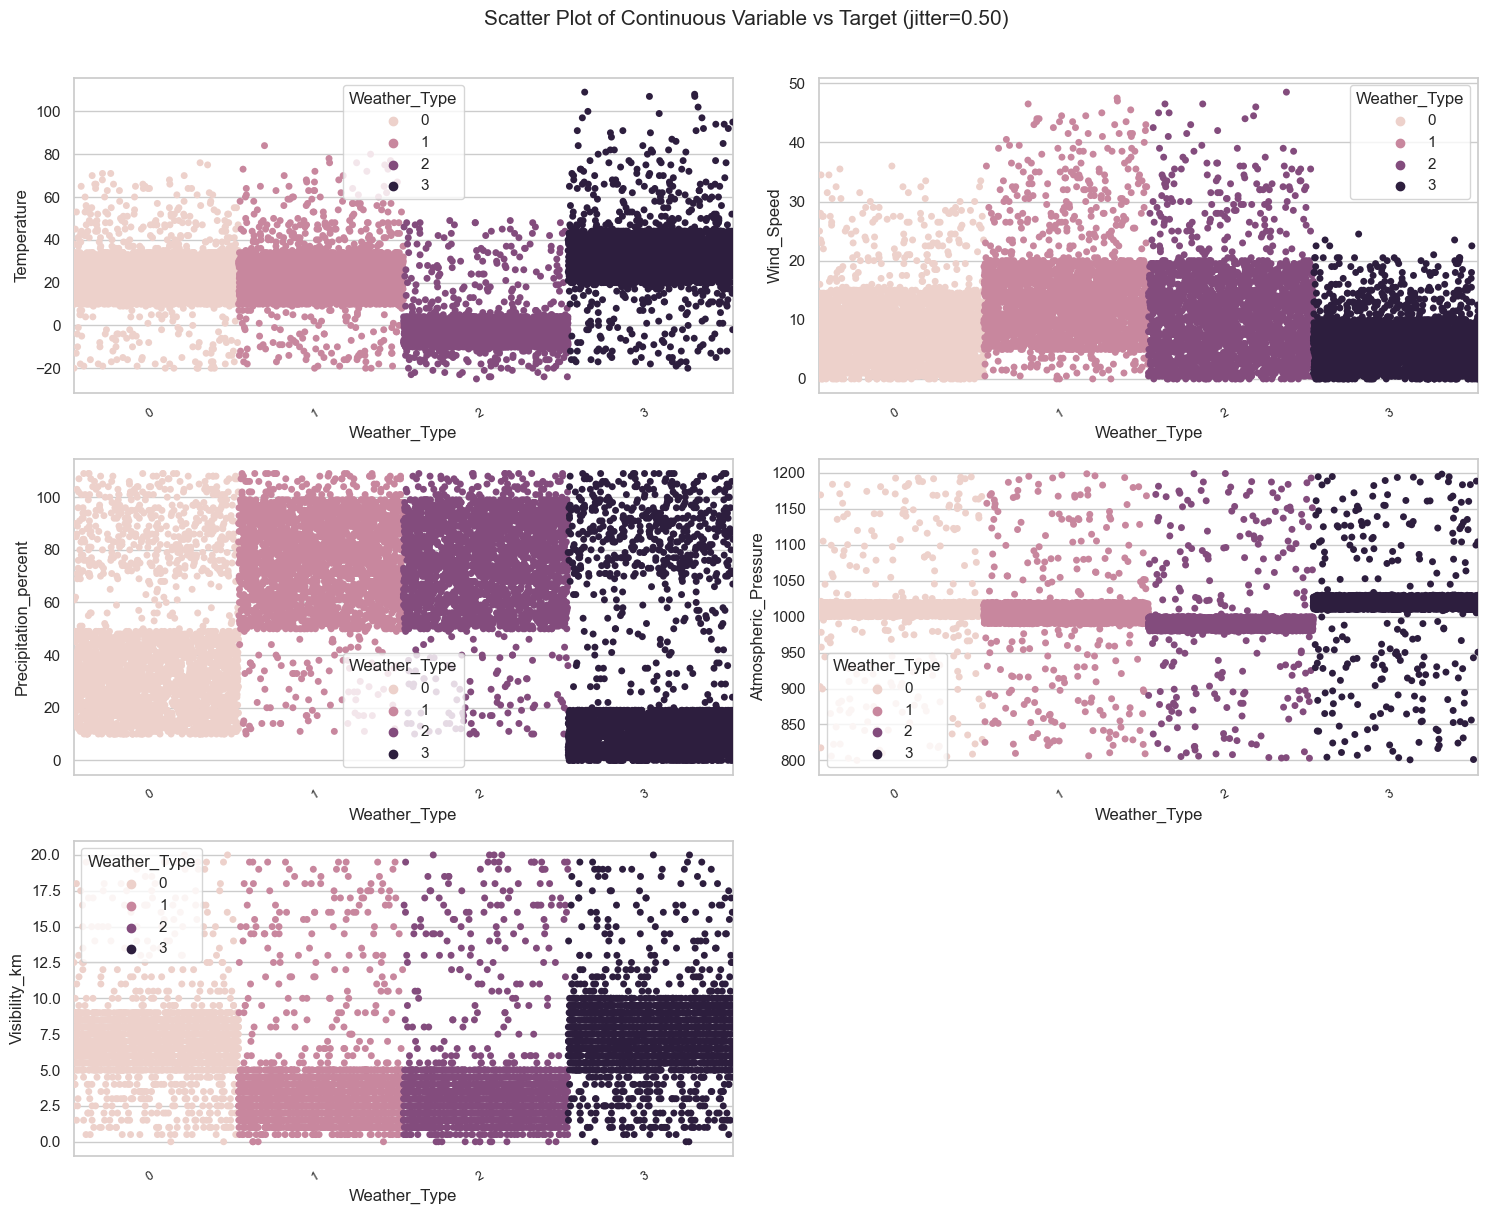

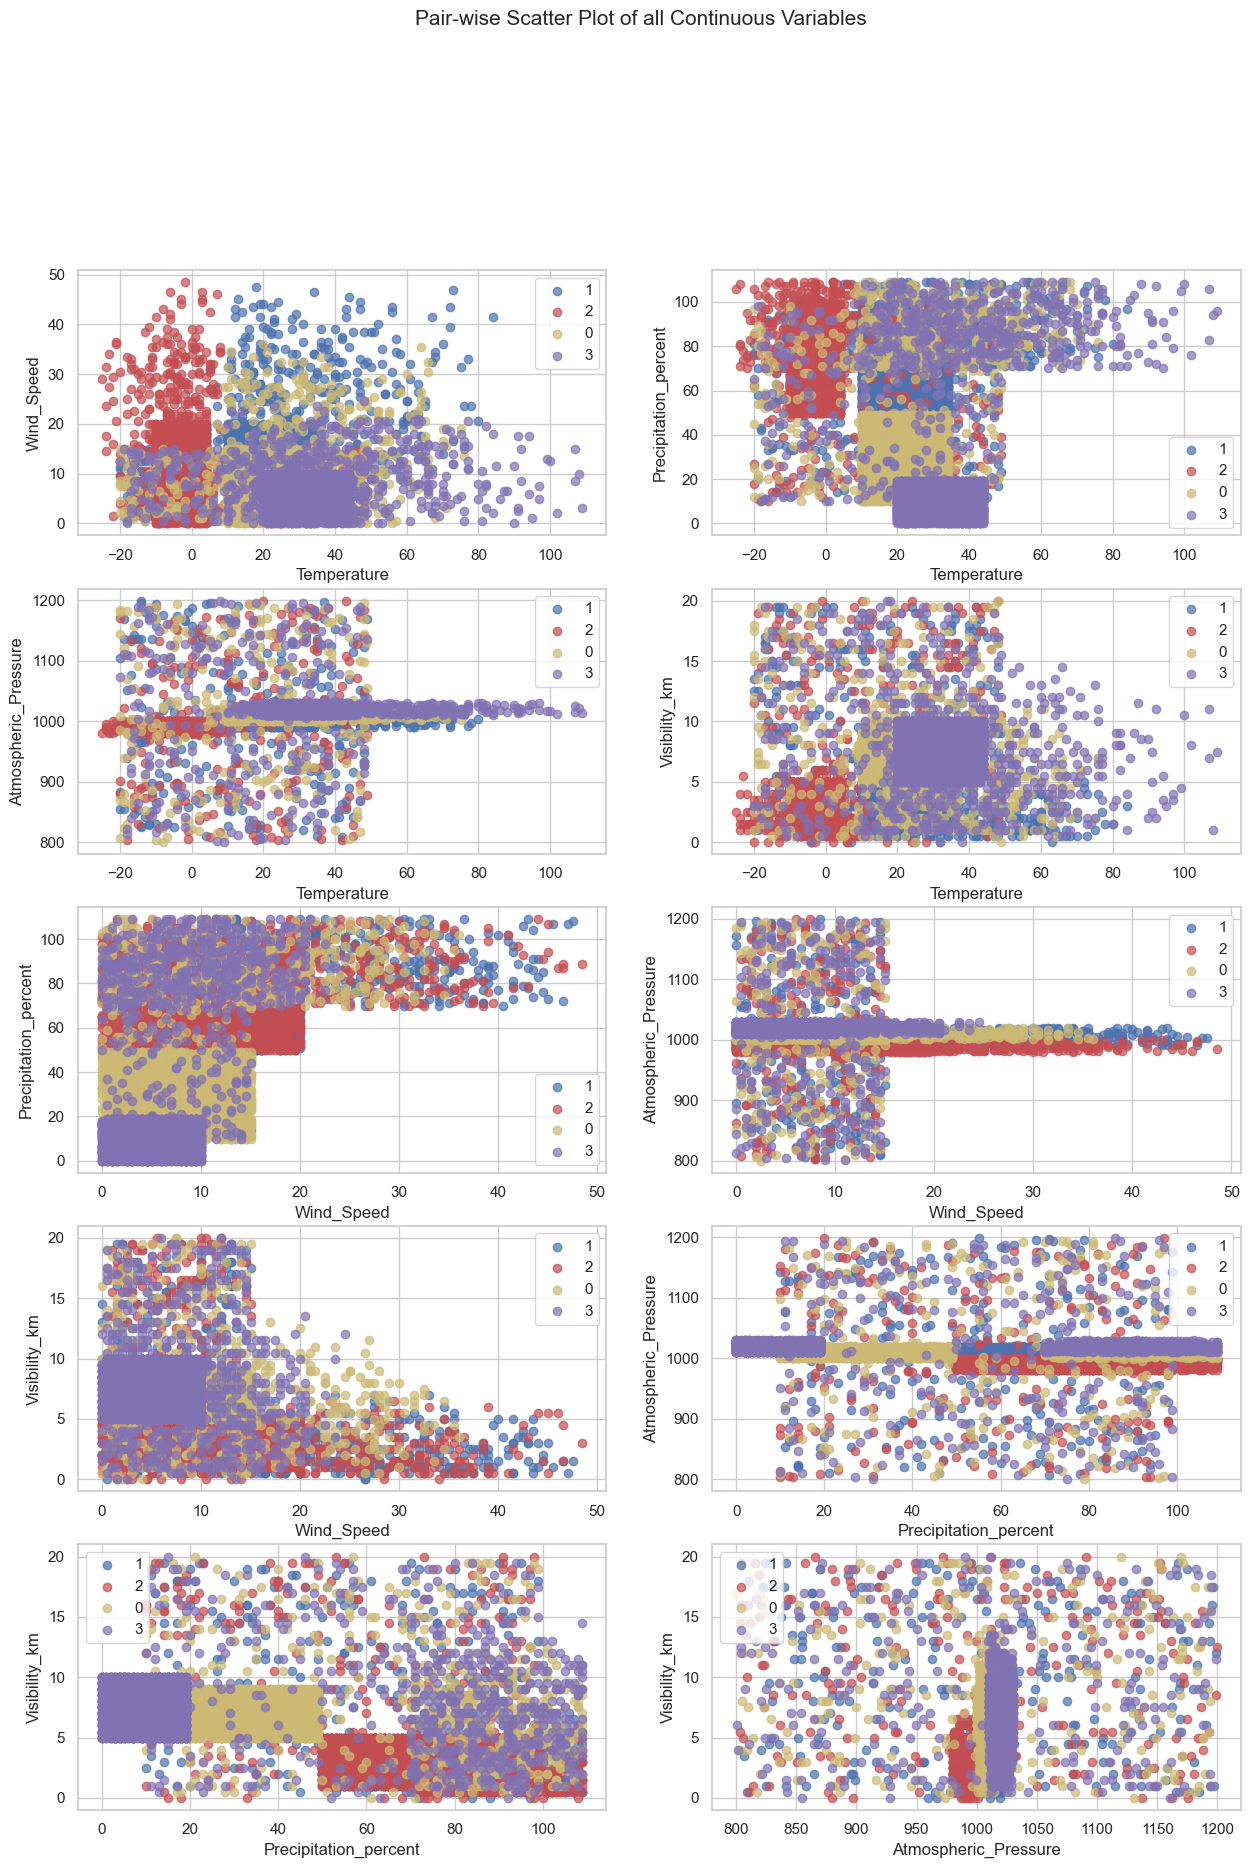

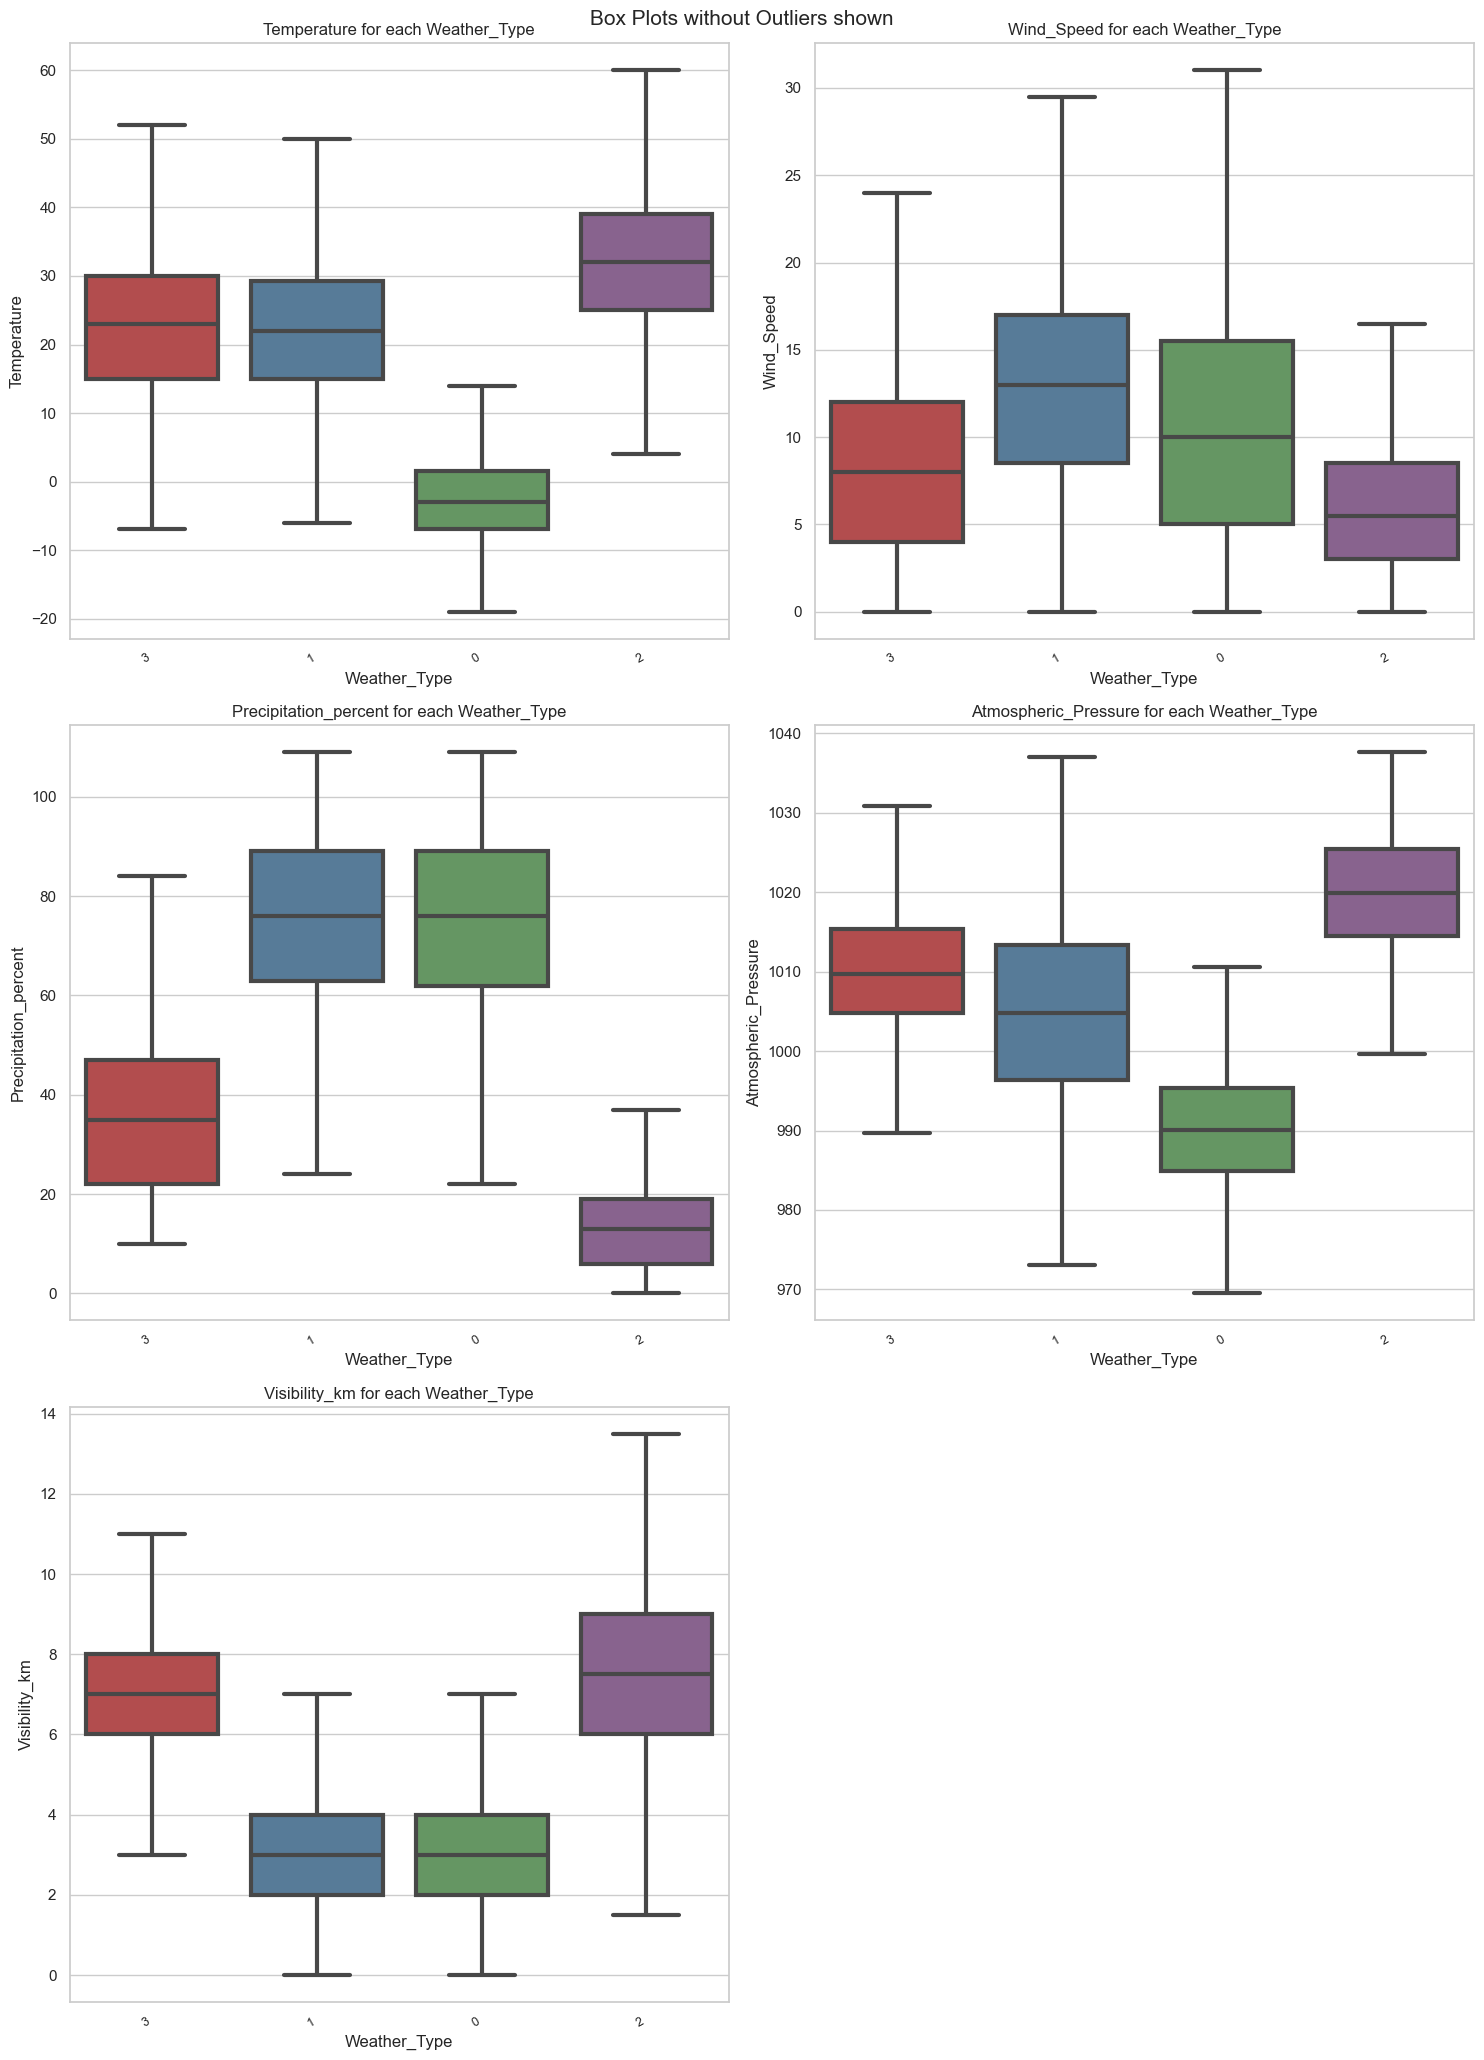

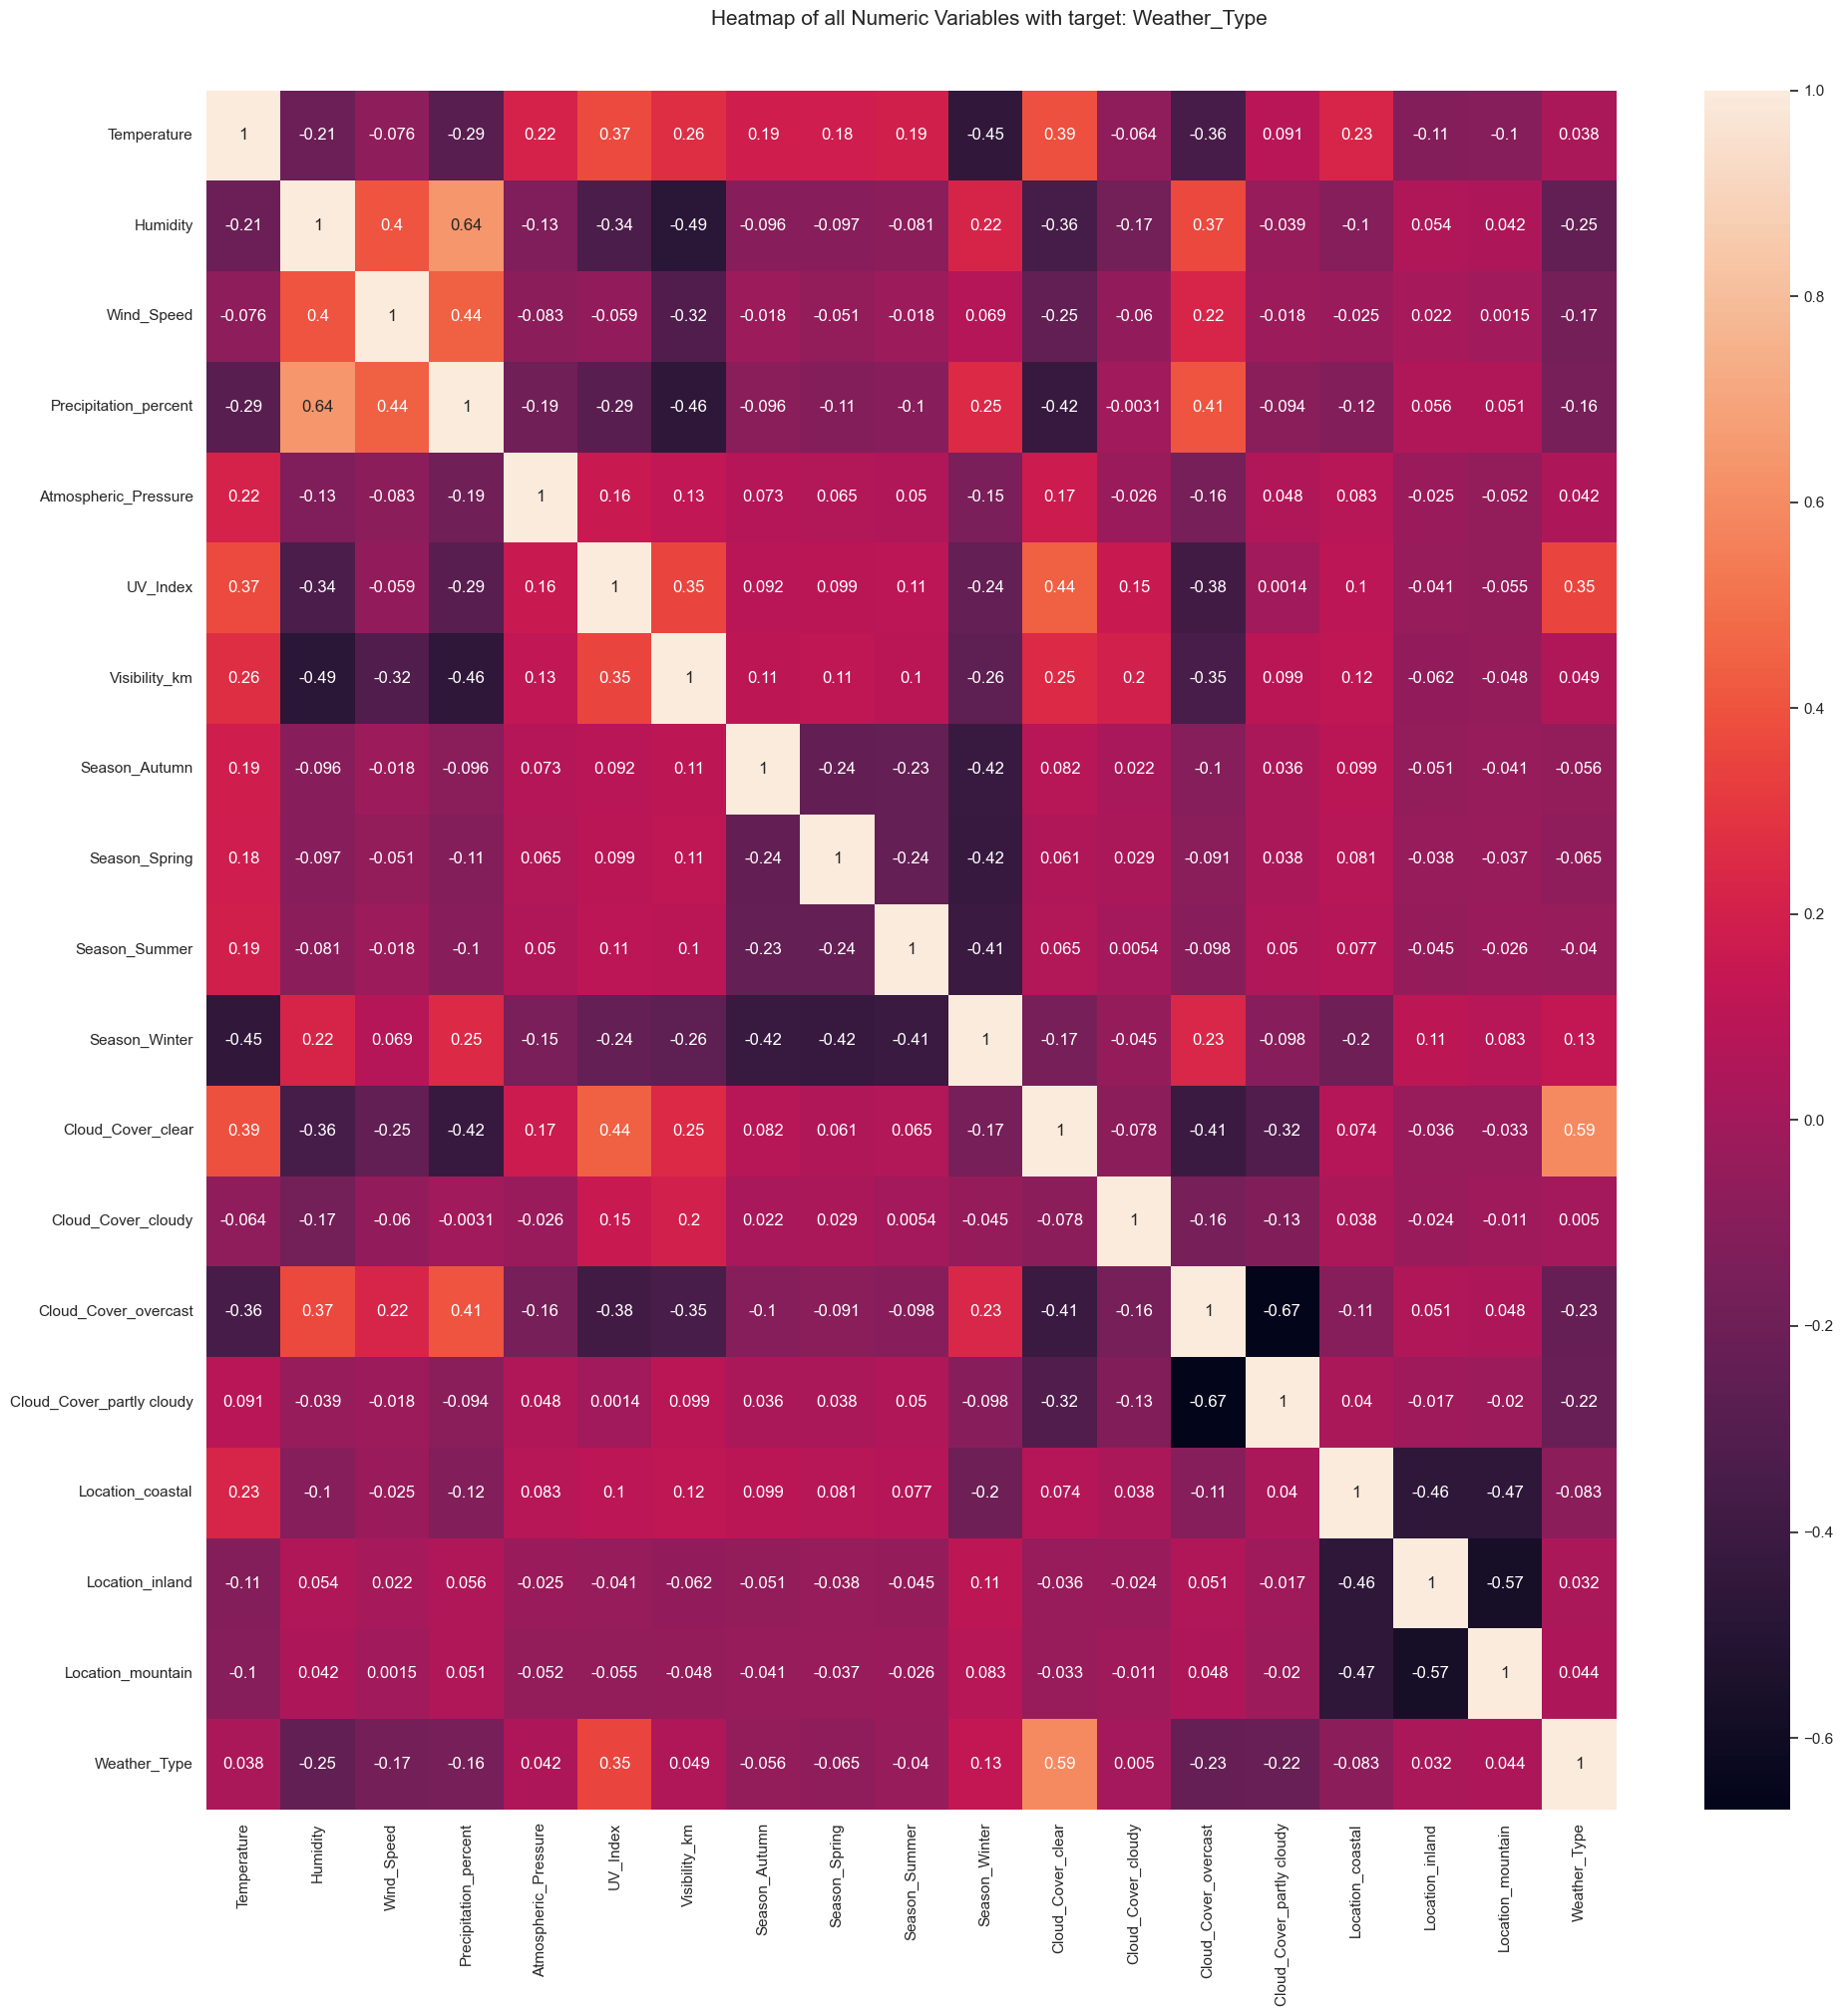

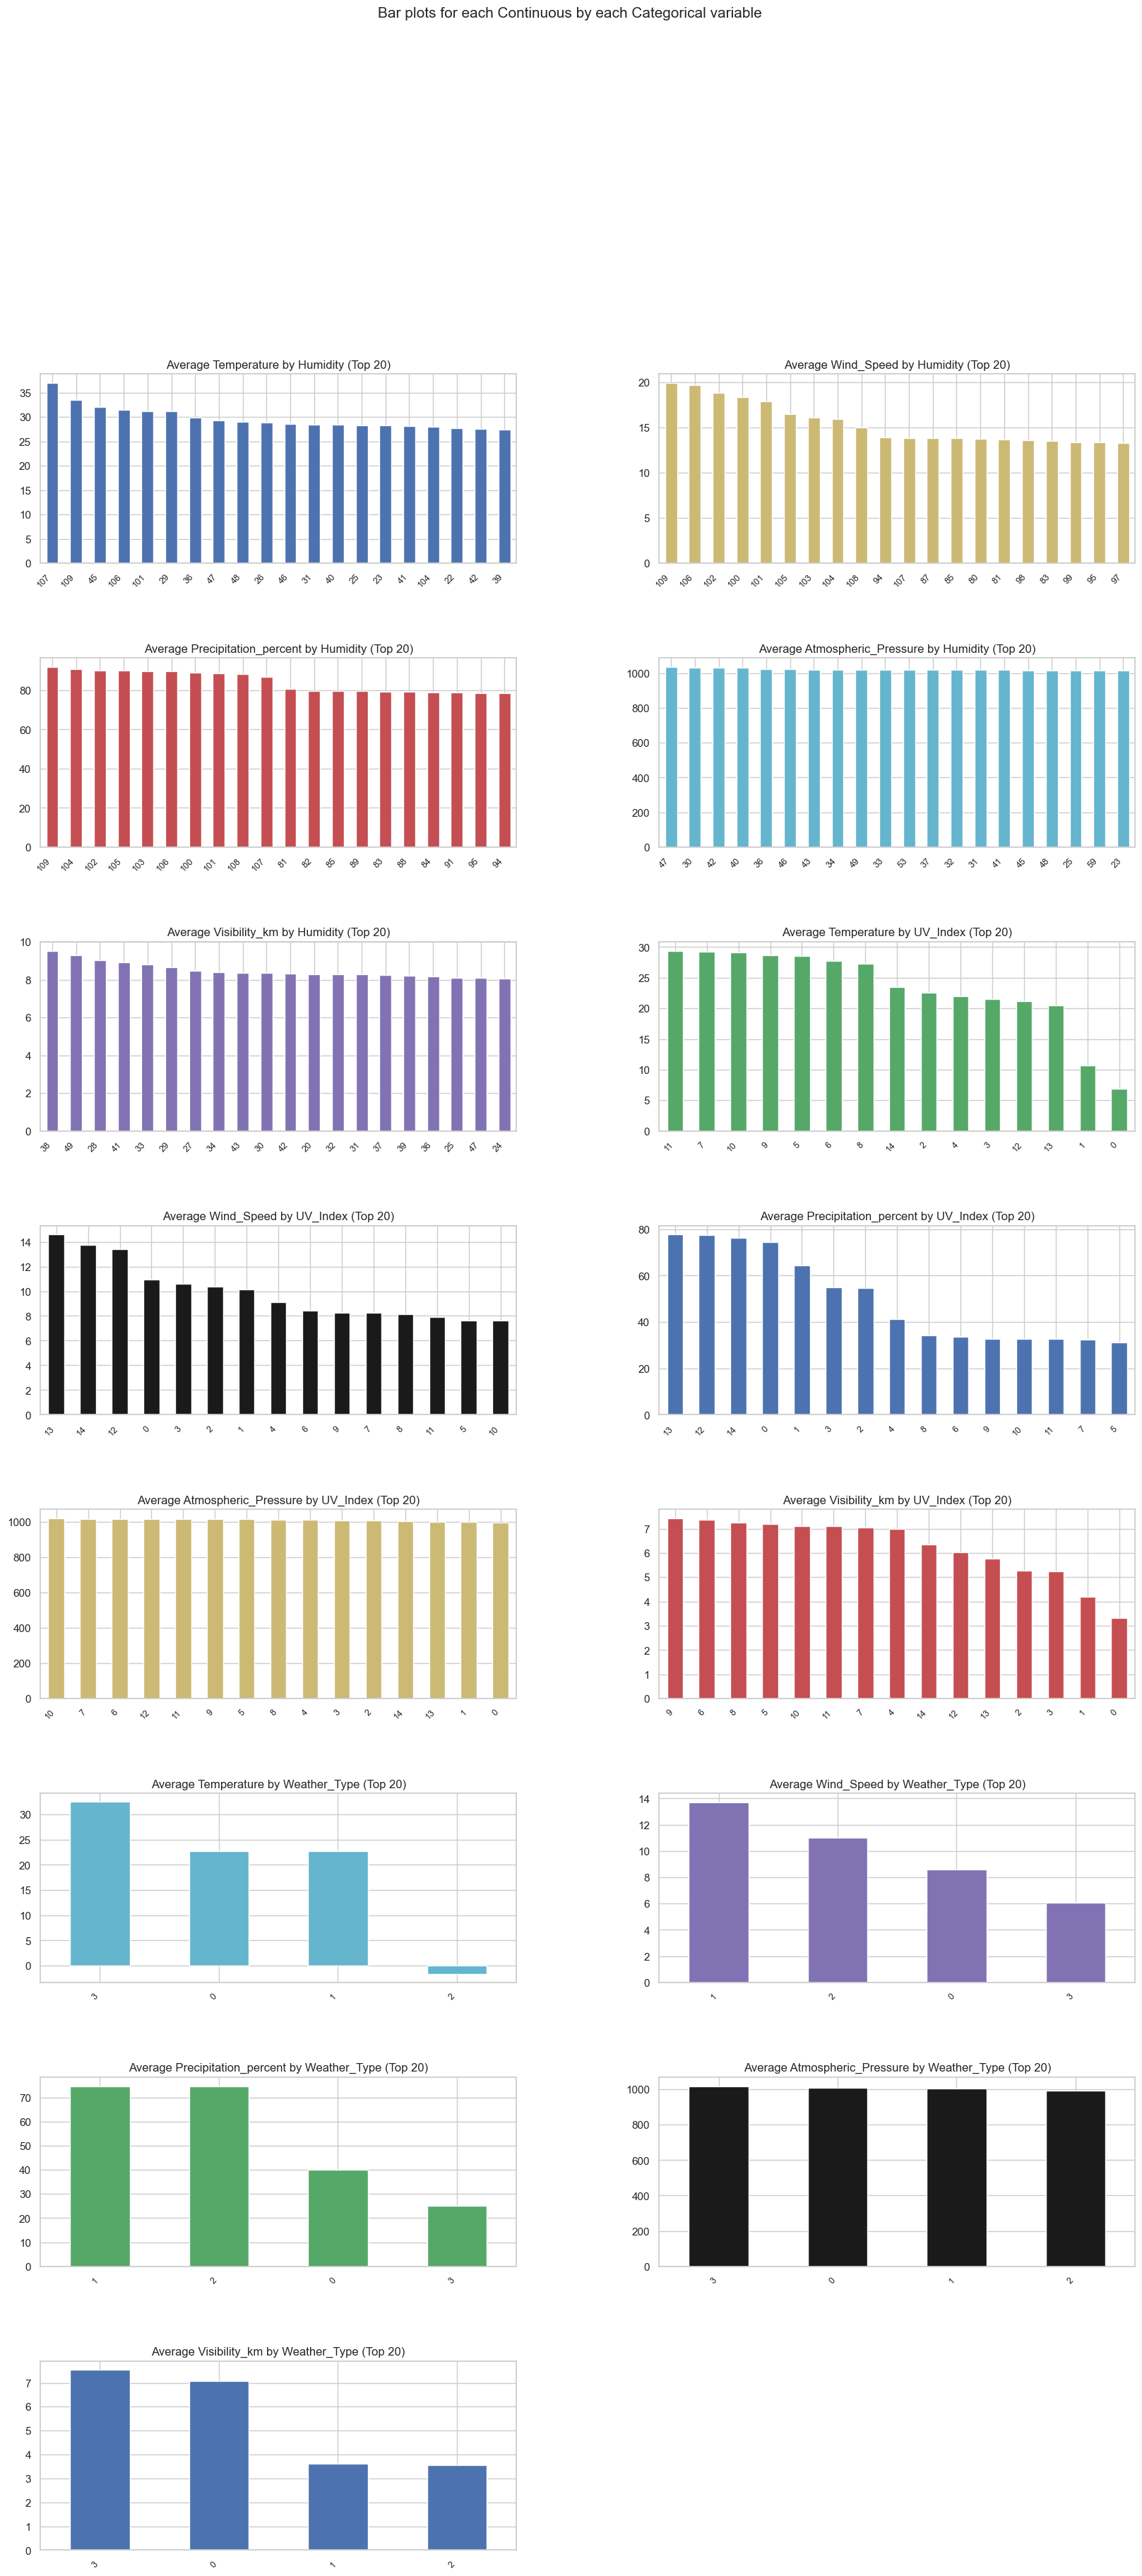

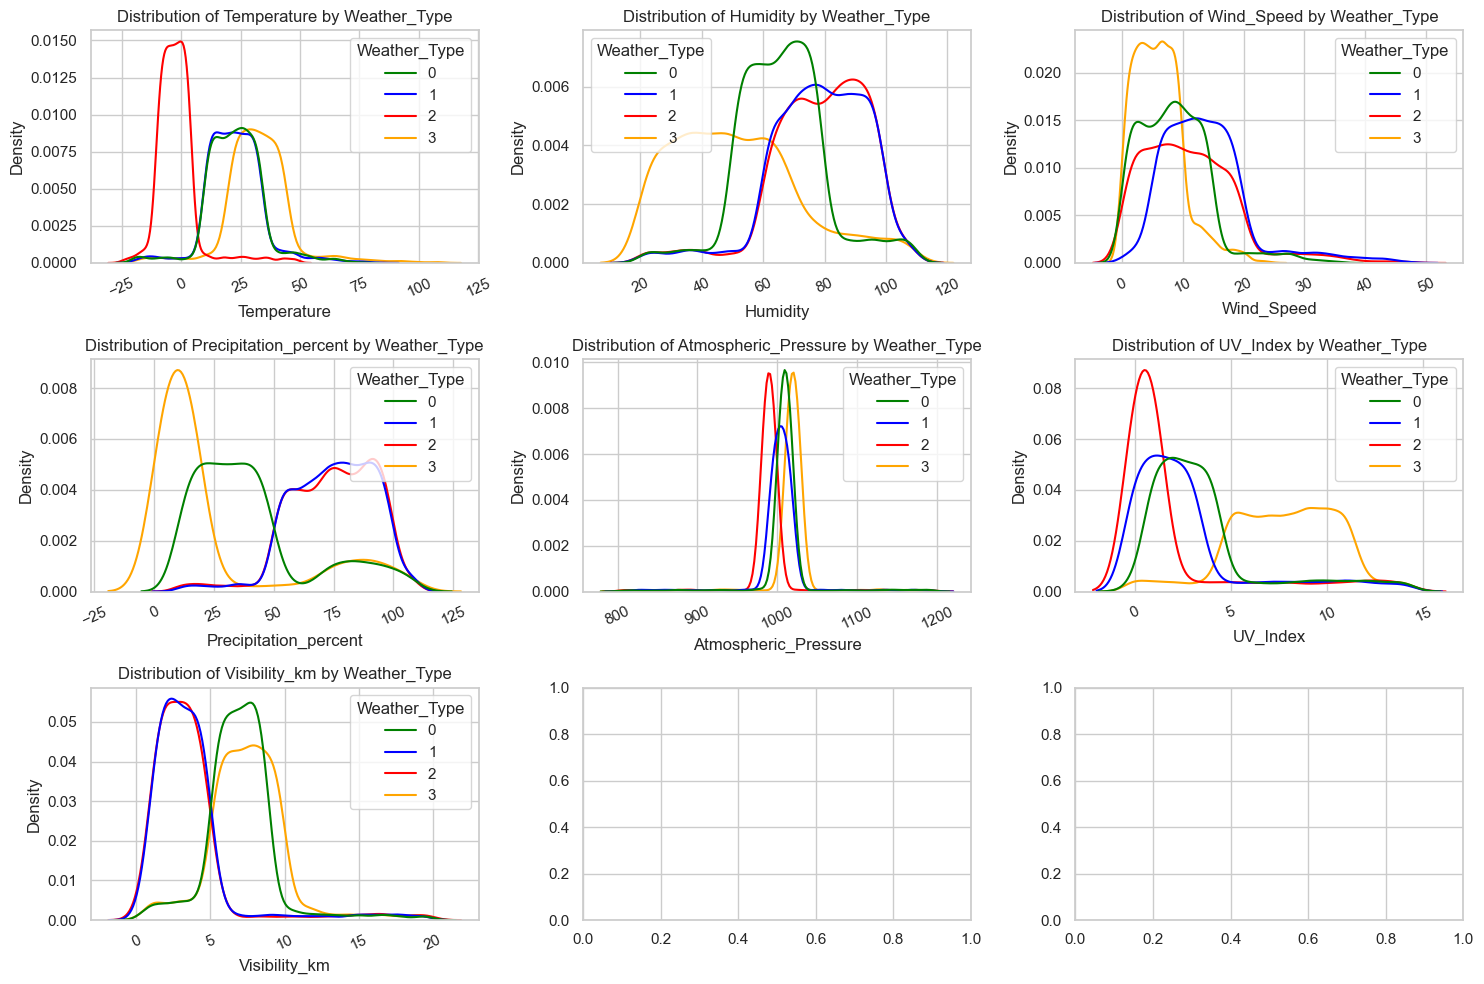

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax = ax.flatten()

# Custom color palette
palette = {0: 'green', 1: 'blue', 2: 'red', 3: 'orange'}

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=Xe_train, x=col, hue=Ye_train, palette=palette, ax=ax[i])
    ax[i].set_title(f"Distribution of {col} by {'Weather_Type'}")
    ax[i].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

### ii) Categorical Variables 

## Chi-square test
###   (H0): There is no significant association between the two categorical variables
###   (H1): There is a significant association between the two categorical variables

In [39]:
from scipy.stats import chi2_contingency

In [40]:
catdf = train_set[categorical_columns]
selected_columns = catdf.iloc[:, [0, 1, 2]]

In [41]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

results = {}
for column in selected_columns:
    chi2, p = chi_square_test(catdf, 'Weather_Type', column)
    results[column] = {'chi2_statistic': chi2, 'p_value': p}

In [42]:
for column, result in results.items():
    print(f"Chi-Square Test between 'Weather_Type' and '{column}':")
    print(f"Chi-Square Statistic: {result['chi2_statistic']}")
    print(f"P-Value: {result['p_value']}\n")    
    
for column, result in results.items():
    if result['p_value'] < 0.05:
        print(f"There is a significant relationship between 'Weather Type' and '{column}'.")
    else:
        print(f"There is no significant relationship between 'Weather Type' and '{column}'.")    

Chi-Square Test between 'Weather_Type' and 'Cloud_Cover':
Chi-Square Statistic: 9407.359261039586
P-Value: 0.0

Chi-Square Test between 'Weather_Type' and 'Season':
Chi-Square Statistic: 4694.8048070894365
P-Value: 0.0

Chi-Square Test between 'Weather_Type' and 'Location':
Chi-Square Statistic: 1235.3828691365227
P-Value: 1.0518112073147385e-263

There is a significant relationship between 'Weather Type' and 'Cloud_Cover'.
There is a significant relationship between 'Weather Type' and 'Season'.
There is a significant relationship between 'Weather Type' and 'Location'.


## 2) Correlation Analysis 

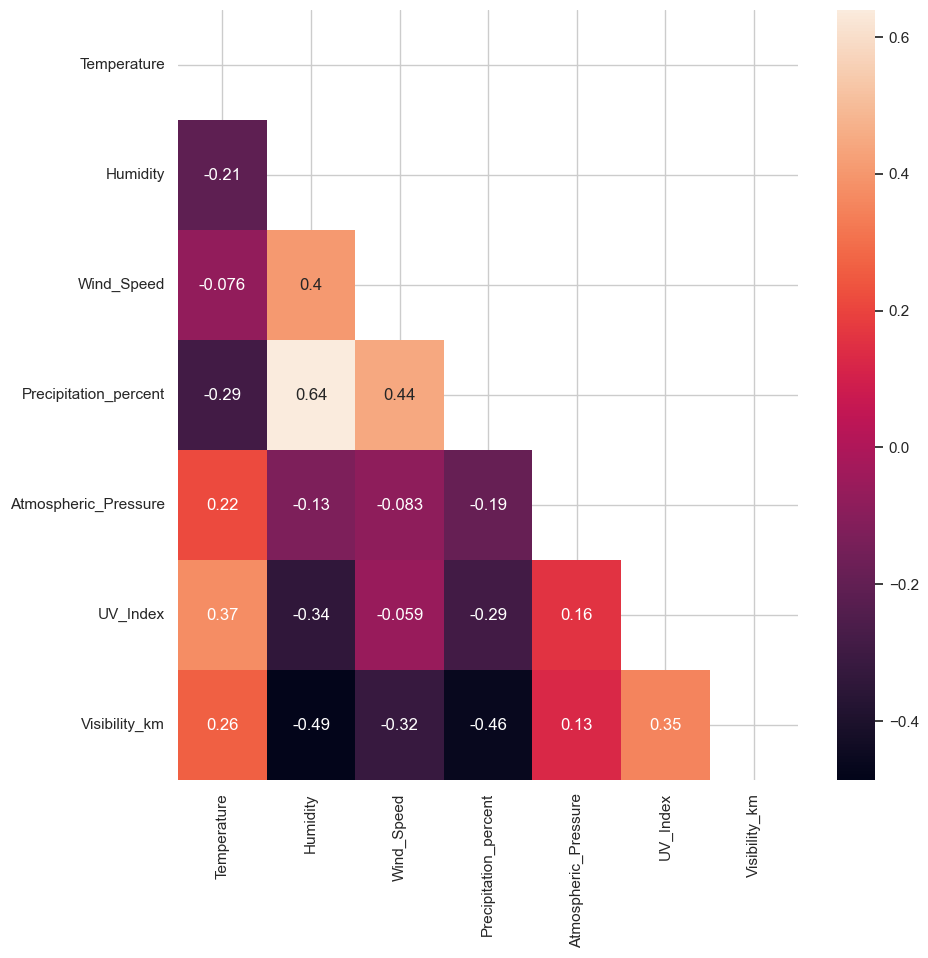

In [43]:
%matplotlib inline
mask = np.triu(np.ones_like(train_set_e[numerical_columns].corr())) 
plt.figure(figsize=(10,10))
sns.heatmap(train_set_e[numerical_columns].corr(),annot=True,mask=mask)
plt.show()

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices

In [45]:
def calculate_gvif(formula, data):
    """
    Calculate Generalized VIF (GVIF) for a given formula and dataset.
    """
    y, X = dmatrices(formula, data, return_type='dataframe')
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.design_info.column_names
    
    # Calculate VIF for each feature
    vif_data["GVIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Manually specify degrees of freedom (di)
    # Assuming continuous variables have di=1
    # and categorical variables have di = number of categories - 1
    degrees_of_freedom = {}
    
    # Define degrees of freedom based on your formula and data
    for feature in vif_data["feature"]:
        if "C(" in feature:
            # Extract the number of levels from the name
            category = feature.split('C(')[-1].split(')')[0]
            num_levels = len(data[category].unique())
            degrees_of_freedom[feature] = num_levels - 1
        else:
            degrees_of_freedom[feature] = 1
    
    vif_data["d_i"] = vif_data["feature"].apply(lambda x: degrees_of_freedom.get(x, 1))
    vif_data["GVIF^(1/(2*d_i))"] = vif_data.apply(lambda row: row["GVIF"]**(1/(2*row["d_i"])), axis=1)
    
    return vif_data

In [46]:
formula = 'Weather_Type ~ Temperature + Humidity + Wind_Speed + Precipitation_percent + Atmospheric_Pressure + UV_Index + Visibility_km + C(Cloud_Cover) + C(Season) + C(Location)'
calculate_gvif(formula,train_set)


feature                  GVIF     d_i  GVIF^(1/(2*d_i))
0                         Intercept  879.479865   1       29.656026   
1          C(Cloud_Cover)[T.cloudy]    1.301976   3        1.044962   
2        C(Cloud_Cover)[T.overcast]    3.620269   3        1.239149   
3   C(Cloud_Cover)[T.partly cloudy]    2.642165   3        1.175782   
4               C(Season)[T.Spring]    1.622314   3        1.083983   
5               C(Season)[T.Summer]    1.600073   3        1.081492   
6               C(Season)[T.Winter]    2.172482   3        1.138045   
7             C(Location)[T.inland]    1.570984   2        1.119549   
8           C(Location)[T.mountain]    1.565212   2        1.118519   
9                       Temperature    1.609404   1        1.268623   
10                         Humidity    1.997335   1        1.413271   
11                       Wind_Speed    1.357637   1        1.165177   
12            Precipitation_percent    2.131882   1        1.460097   
13             Atmospheric_Pressure    1.078904   1        1.038703   
14                         UV_Index    1.532716   1        1.238029   
15                    Visibility_km    1.553106   1        1.246237

In [47]:
vif_data = pd.DataFrame() 
vif_data["feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(train_set_e[numerical_columns].values, i) 
                          for i in range(len(train_set_e[numerical_columns].columns))] 
  
print(vif_data)

         feature             VIF   
0            Temperature   2.751619
1               Humidity  23.868021
2             Wind_Speed   3.986590
3  Precipitation_percent   7.450228
4   Atmospheric_Pressure  28.961191
5               UV_Index   2.789425
6          Visibility_km   5.337402


# Plots

In [48]:
pip install bluecast

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [50]:
from bluecast.eda.analyse import (
    plot_pie_chart,
    plot_count_pairs,
    bi_variate_plots,
    correlation_heatmap,
    correlation_to_target,
    plot_pca,
    plot_pca_cumulative_variance,
    plot_theil_u_heatmap,
    plot_tsne,
    univariate_plots,
    check_unique_values,
    plot_null_percentage,
    mutual_info_to_target )

In [51]:
from bluecast.preprocessing.feature_types import FeatureTypeDetector

In [52]:
ignore_cols = []

f_type_detector = FeatureTypeDetector()
data = f_type_detector.fit_transform_feature_types(train_set.drop(ignore_cols, axis=1))

print("num_data", len(f_type_detector.num_columns))
print("cat_data", len(f_type_detector.cat_columns))

num_data 7
cat_data 4


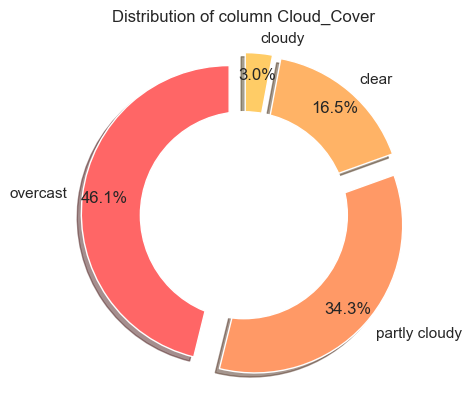

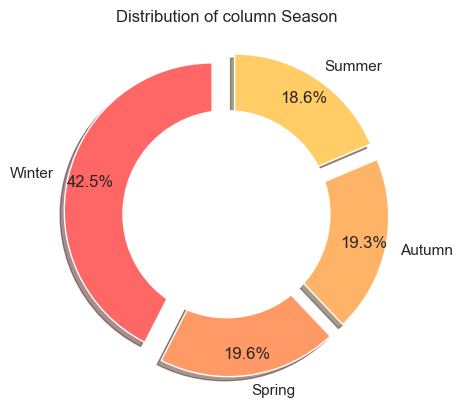

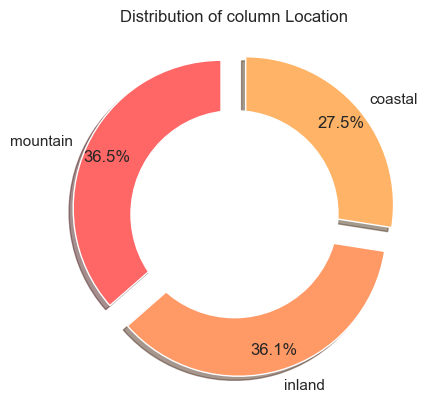

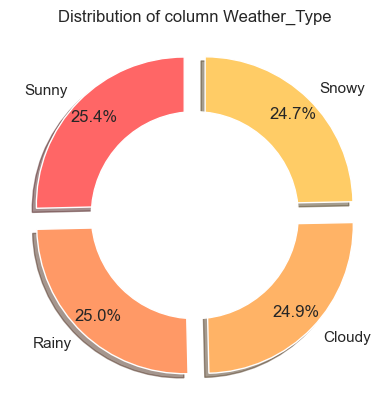

In [53]:
for col in f_type_detector.cat_columns:
    plot_pie_chart(
            data,
            col,
        )

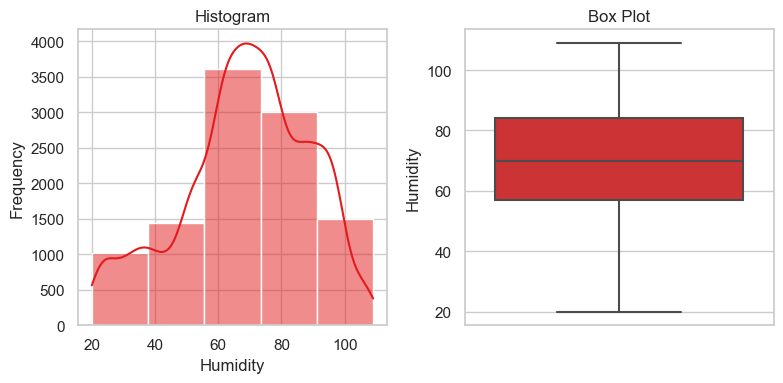

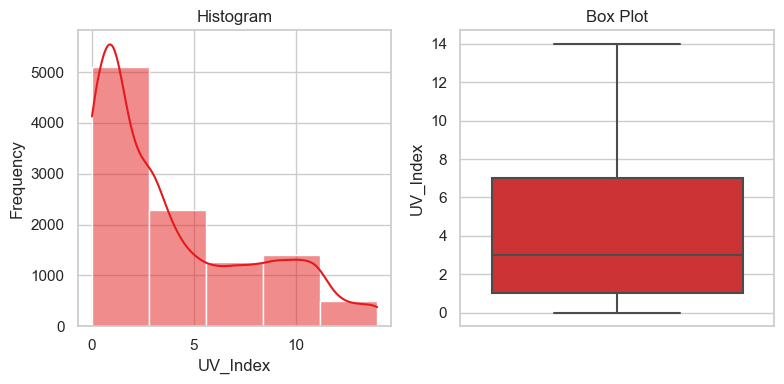

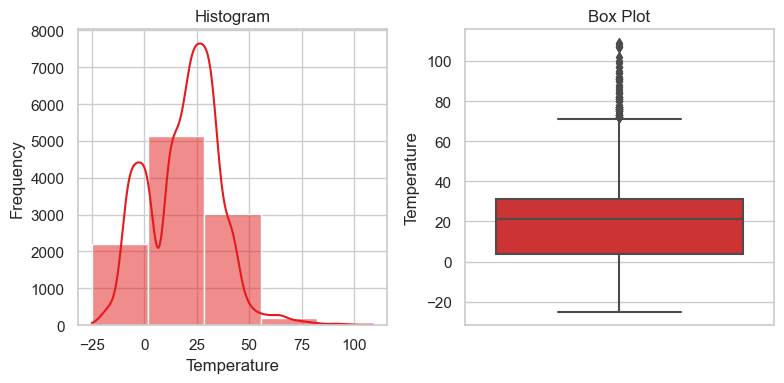

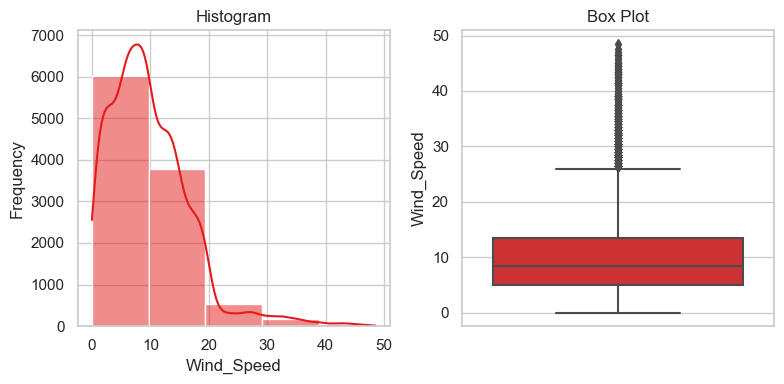

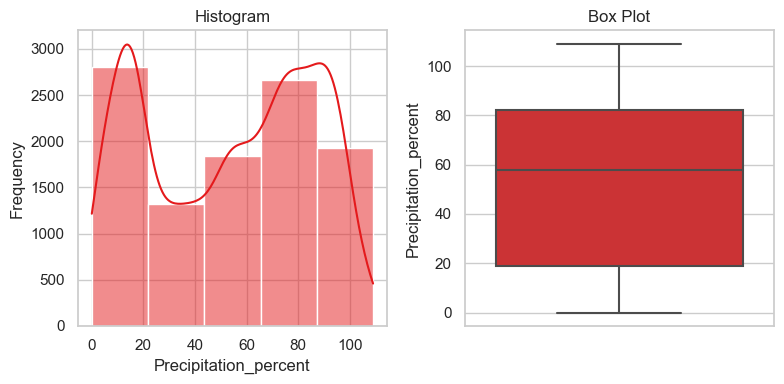

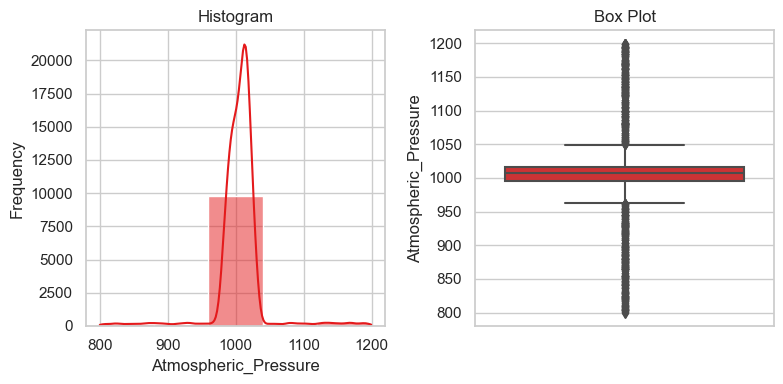

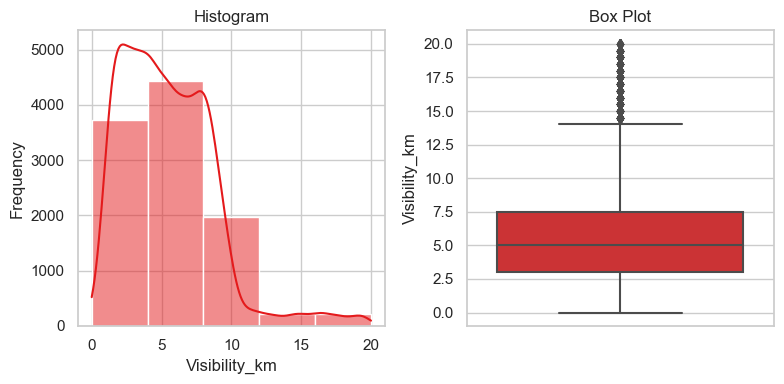

In [54]:
univariate_plots(
        data.loc[:, f_type_detector.num_columns]
    )

In [55]:
data_plot = data.copy()
YP  = data_plot['Weather_Type']
XP = data_plot.drop('Weather_Type',axis=1)
XP_train, XP_test, YP_train, YP_test = train_test_split(XP, YP, test_size=0.2, random_state=10)
train_set_P = pd.concat([XP_train,YP_train],axis=1)
test_set_P =  pd.concat([XP_test,YP_test],axis=1)

In [56]:
train_set_P

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
10241     28.0         60         8.0              26.0           
11741     14.0         77        12.5              48.0           
4835      12.0         59         7.0              25.0           
10240     17.0         66         1.5              28.0           
335       16.0         87        14.0              50.0           
...            ...       ...         ...                    ...   
5972      32.0         68         5.5              35.0           
7195      43.0         31         5.0               0.0           
11046     77.0         73        15.5             104.0           
5600      30.0         61         7.5               6.0           
10286     39.0         36         9.0               4.0           

       Cloud_Cover    Atmospheric_Pressure  UV_Index  Season  Visibility_km  \
10241  partly cloudy         1017.02            4     Autumn       8.0        
11741       overcast         1005.25            2     Spring       5.5        
4835   partly cloudy         1011.31            2     Winter       6.0        
10240         cloudy         1099.65            9     Autumn      18.5        
335         overcast         1001.96            0     Summer       4.5        
...              ...                   ...       ...     ...            ...   
5972        overcast         1004.95            2     Summer       6.5        
7195           clear         1011.31            5     Spring       7.5        
11046          clear         1021.88            4     Autumn       7.0        
5600   partly cloudy         1019.19           10     Spring       9.5        
10286  partly cloudy         1025.59           11     Summer       6.0        

       Location Weather_Type  
10241  mountain    Cloudy     
11741   coastal    Cloudy     
4835    coastal    Cloudy     
10240  mountain     Sunny     
335    mountain     Rainy     
...         ...          ...  
5972     inland    Cloudy     
7195     inland     Sunny     
11046    inland     Sunny     
5600     inland     Sunny     
10286    inland     Sunny     

[8448 rows x 11 columns]

<Figure size 1500x1500 with 0 Axes>

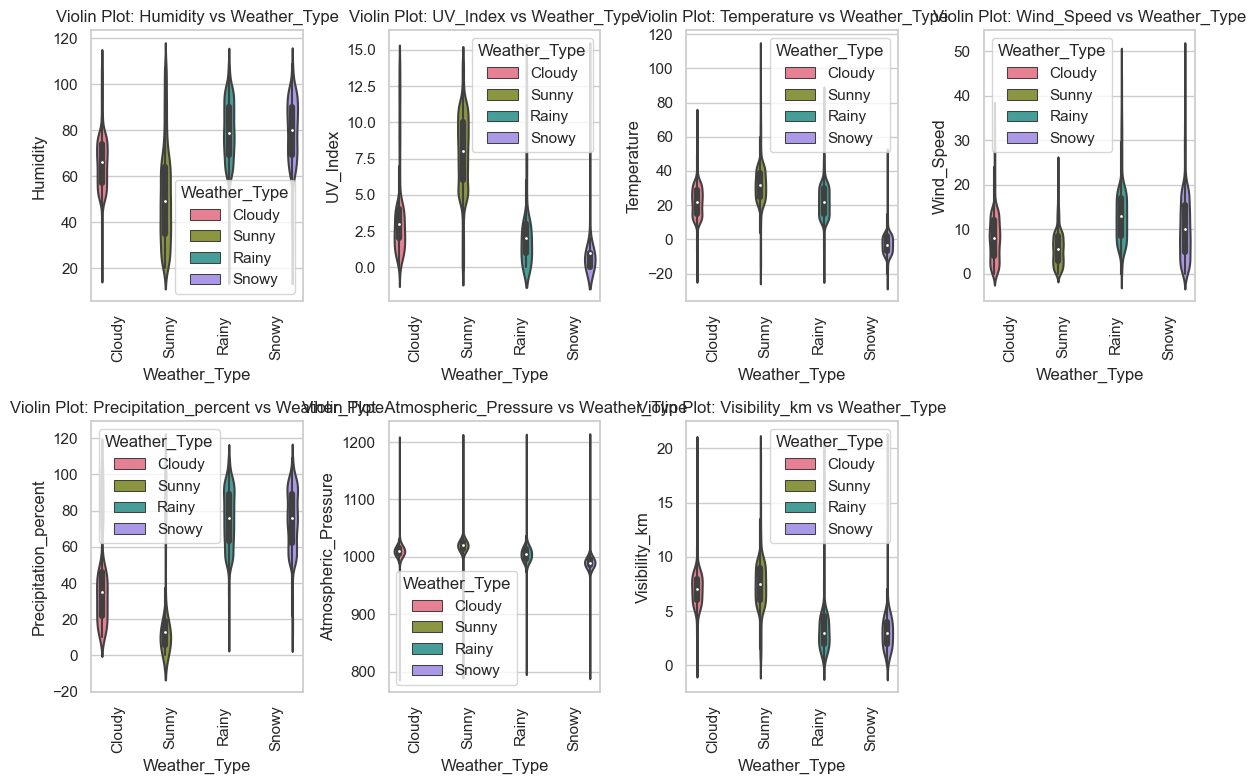

In [57]:
plt.figure(figsize=(15, 15))  
response = 'Weather_Type'

# Ensure `f_type_detector.num_columns` is a list of numerical columns and add the `response` column
columns_to_plot = f_type_detector.num_columns + [response]

# Pass the correct DataFrame slice to the function
bi_variate_plots(
    train_set_P.loc[:, columns_to_plot],  # Ensure 'train_set_p' has 'Weather_Type'
    response,  # This should be the column name, not a list
)

In [58]:
train_set_P['Weather_Type'] = train_set_P['Weather_Type'].astype('category')
print(train_set_P['Weather_Type'].unique())

['Cloudy', 'Sunny', 'Rainy', 'Snowy']
Categories (4, object): ['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [59]:
#print(train_set_P[['Weather_Type'] + num_data.columns.tolist()].isnull().sum())

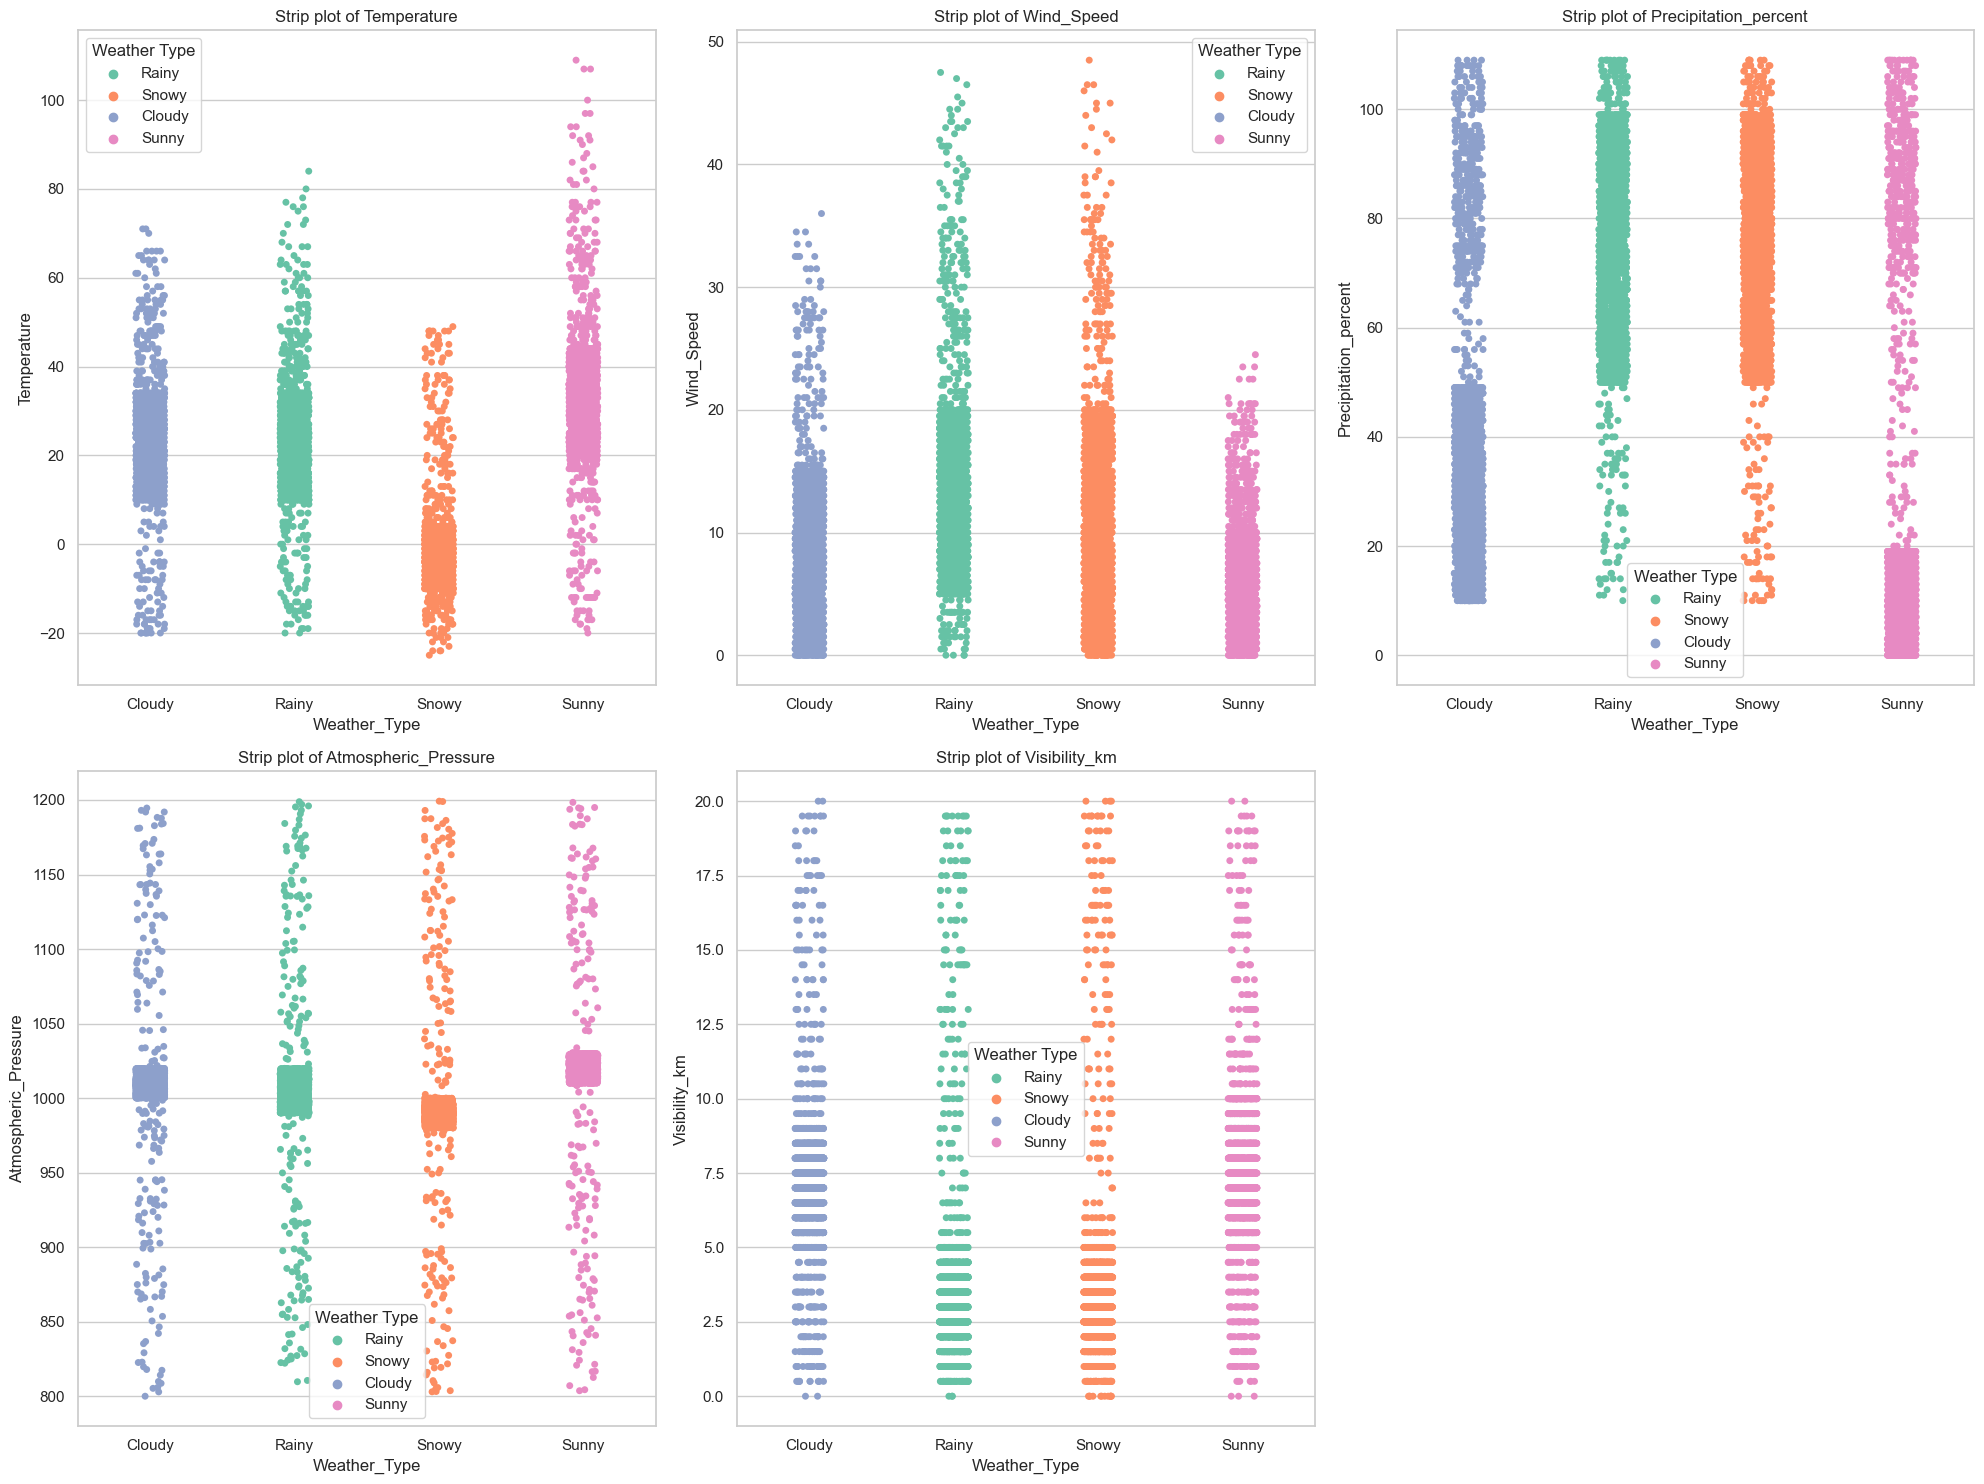

In [60]:
train_set_P['Weather_Type'] = train_set_P['Weather_Type'].astype('category')

# Filter out numerical data
num_data = train_set_P.select_dtypes(include=['float'])

# Initialize the figure and the axes
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

axes = axes.flatten()
hue_order = ['Rainy', 'Snowy', 'Cloudy', 'Sunny']

# plots in each subplot
for idx, col in enumerate(num_data.columns):
    sns.stripplot(ax=axes[idx], x=train_set_P['Weather_Type'], y=train_set_P[col], hue=train_set_P['Weather_Type'], hue_order=hue_order, jitter=True, palette="Set2")
    axes[idx].set_title(f'Strip plot of {col}')
    axes[idx].legend(title='Weather Type')
    
# Remove unused subplots if any
for i in range(len(num_data.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

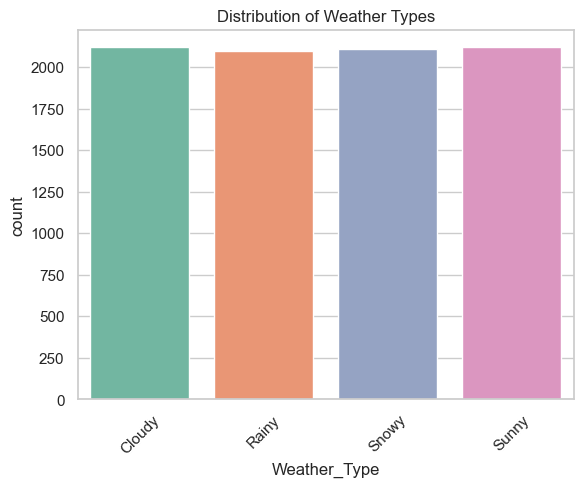

In [61]:
sns.countplot(x='Weather_Type', data=train_set_P, palette="Set2")
plt.title('Distribution of Weather Types')
plt.xticks(rotation=45)
plt.show()

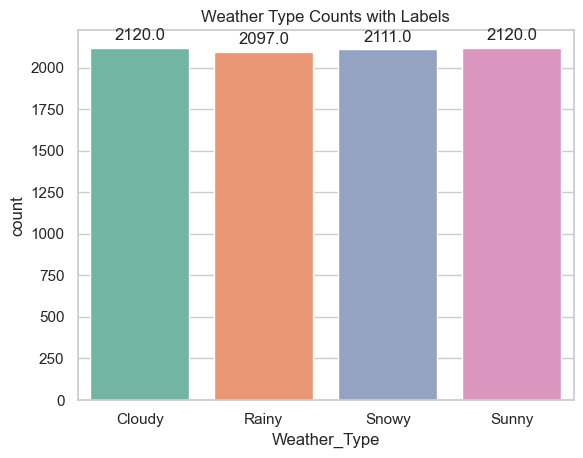

In [62]:
ax = sns.countplot(x='Weather_Type', data=train_set_P, palette="Set2")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Weather Type Counts with Labels')
plt.show()

In [63]:
train_set_P

Temperature  Humidity  Wind_Speed  Precipitation_percent  \
10241     28.0         60         8.0              26.0           
11741     14.0         77        12.5              48.0           
4835      12.0         59         7.0              25.0           
10240     17.0         66         1.5              28.0           
335       16.0         87        14.0              50.0           
...            ...       ...         ...                    ...   
5972      32.0         68         5.5              35.0           
7195      43.0         31         5.0               0.0           
11046     77.0         73        15.5             104.0           
5600      30.0         61         7.5               6.0           
10286     39.0         36         9.0               4.0           

       Cloud_Cover    Atmospheric_Pressure  UV_Index  Season  Visibility_km  \
10241  partly cloudy         1017.02            4     Autumn       8.0        
11741       overcast         1005.25            2     Spring       5.5        
4835   partly cloudy         1011.31            2     Winter       6.0        
10240         cloudy         1099.65            9     Autumn      18.5        
335         overcast         1001.96            0     Summer       4.5        
...              ...                   ...       ...     ...            ...   
5972        overcast         1004.95            2     Summer       6.5        
7195           clear         1011.31            5     Spring       7.5        
11046          clear         1021.88            4     Autumn       7.0        
5600   partly cloudy         1019.19           10     Spring       9.5        
10286  partly cloudy         1025.59           11     Summer       6.0        

       Location Weather_Type  
10241  mountain    Cloudy     
11741   coastal    Cloudy     
4835    coastal    Cloudy     
10240  mountain     Sunny     
335    mountain     Rainy     
...         ...          ...  
5972     inland    Cloudy     
7195     inland     Sunny     
11046    inland     Sunny     
5600     inland     Sunny     
10286    inland     Sunny     

[8448 rows x 11 columns]

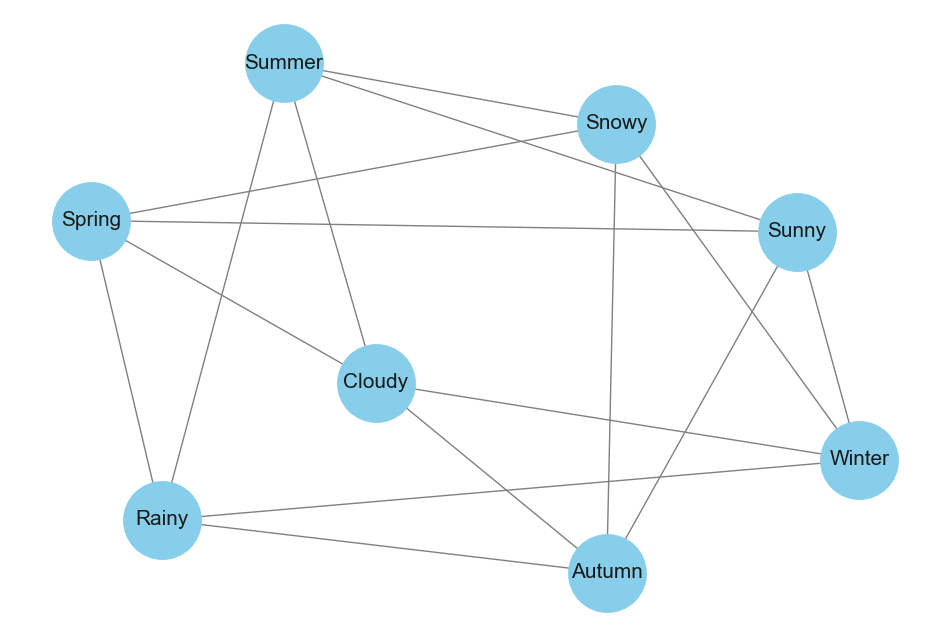

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.from_pandas_edgelist(train_set_P, source='Weather_Type', target='Season')

# Explicitly create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create layout for the graph
pos = nx.spring_layout(G, k=0.3)

# Draw the graph on the created axis
nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', linewidths=2, font_size=15)

# Display the graph
plt.show()

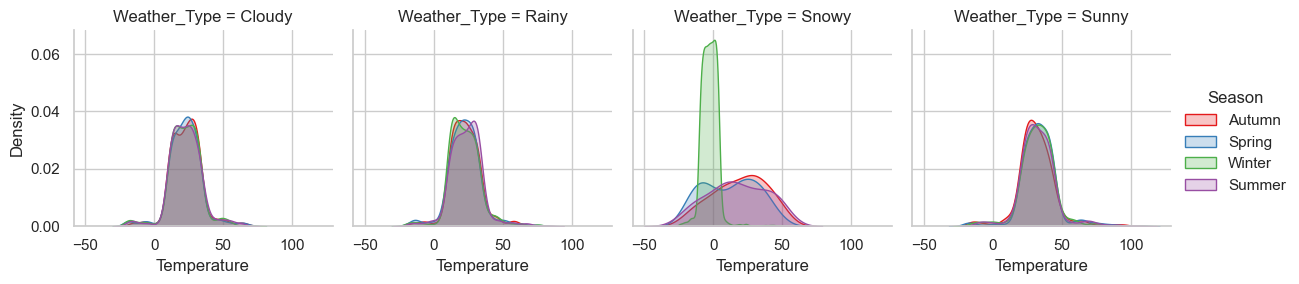

In [65]:
g = sns.FacetGrid(train_set_P, col='Weather_Type', hue='Season', col_wrap=4, height=3)
g.map(sns.kdeplot, 'Temperature', fill=True)
g.add_legend()
plt.show()

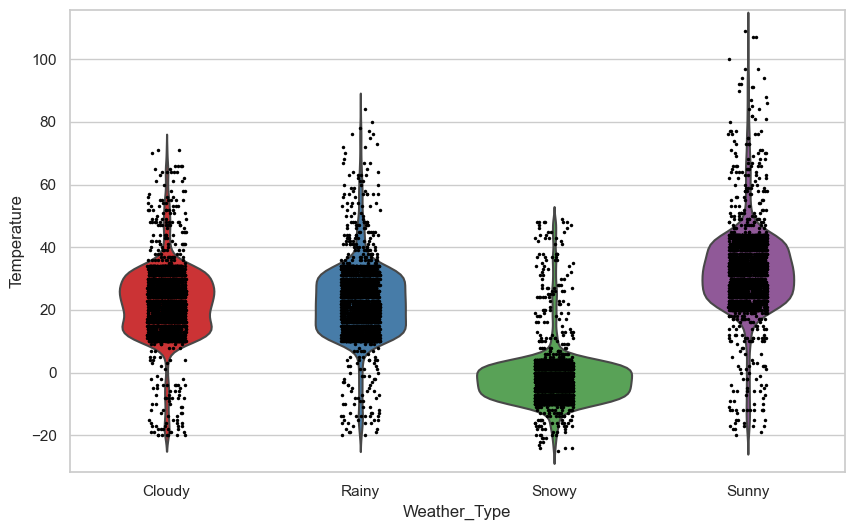

In [66]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Weather_Type', y='Temperature', data=train_set_P,inner=None)
sns.stripplot(x='Weather_Type', y='Temperature', data=train_set_P, color='black', jitter=True, size=2.5)
plt.show()

In [67]:
#g = sns.PairGrid(train_set_P)
#g.map_upper(sns.kdeplot, cmap="Blues_d")
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot, lw=3)
#plt.show()

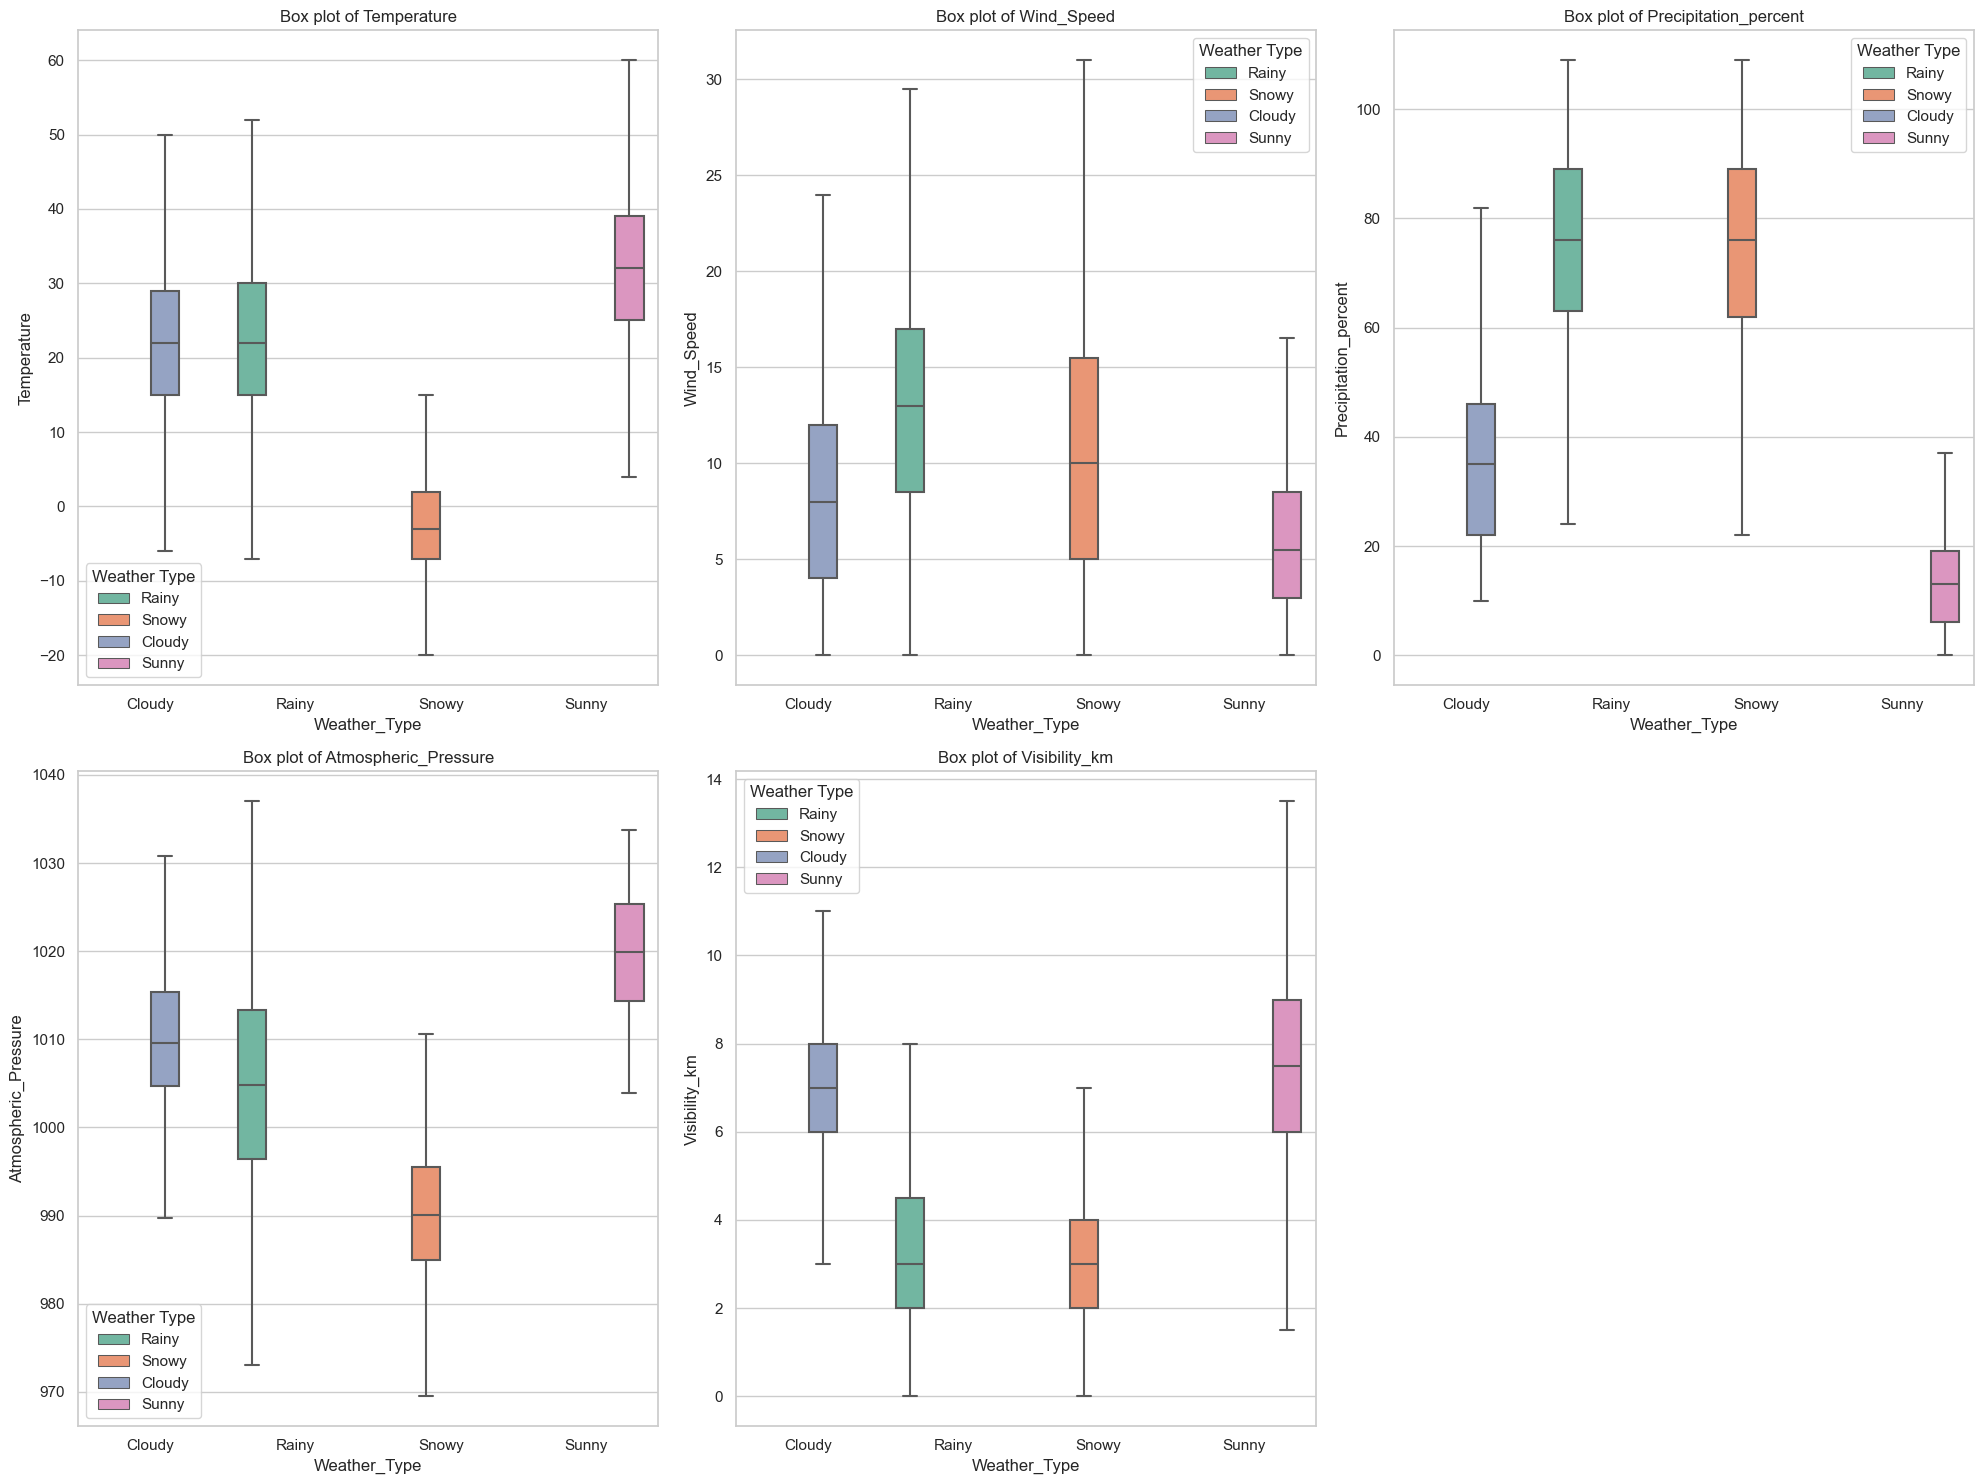

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

axes = axes.flatten()
hue_order = ['Rainy', 'Snowy', 'Cloudy', 'Sunny']

# plots in each subplot
for idx, col in enumerate(num_data.columns):
    sns.boxplot(
        ax=axes[idx], 
        x=train_set_P['Weather_Type'], 
        y=train_set_P[col], 
        hue=train_set_P['Weather_Type'], 
        hue_order=hue_order, 
        palette="Set2",
        showfliers=False  # This hides the outliers in the box plot
    )
    axes[idx].set_title(f'Box plot of {col}')
    axes[idx].legend(title='Weather Type')
    
# Remove unused subplots if any
for i in range(len(num_data.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [69]:
#sns.swarmplot(data=train_set_P, x='Weather_Type', y=col, palette="Set2")
#plt.title(f'Swarm Plot of {col} by Weather Type')
#plt.show()

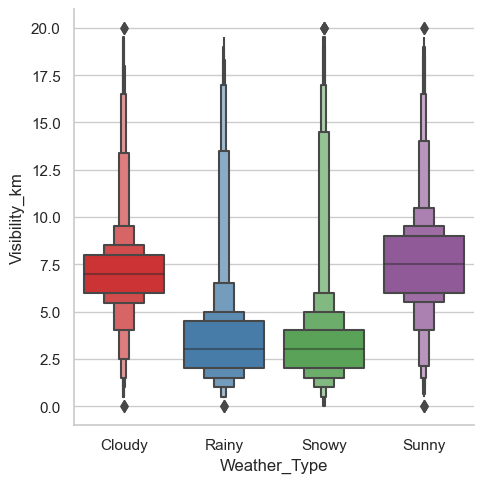

In [70]:
sns.catplot(data=train_set_P, x='Weather_Type', y=col,hue_order=hue_order, kind="boxen")

In [71]:
#import plotly.graph_objects as go

# Assuming train_set_P is your DataFrame and col1 and col2 are numerical columns
# Convert categorical column to numeric for plotting
#train_set_P['Weather_Type_Num'] = train_set_P['Weather_Type'].astype('category').cat.codes

# Prepare data
#x = train_set_P['Weather_Type_Num']
#y = train_set_P[col1]
#z = train_set_P[col2]
#categories = train_set_P['Weather_Type']

# Create a scatter plot
#fig = go.Figure(data=[go.Scatter3d(
    #x=x, 
    #y=y, 
    #z=z,
    #mode='markers',
    #marker=dict(
        #size=5,
        #color=x,
        #colorscale='Viridis',
        #showscale=True
    ),
    #text=categories
)])

#fig.update_layout(
    #scene=dict(
        #xaxis_title='Weather Type',
        #yaxis_title=col1,
        3zaxis_title=col2
    ),
    #title='3D Scatter Plot'
)

#fig.show()

IndentationError: unexpected indent (4072517564.py, line 24)

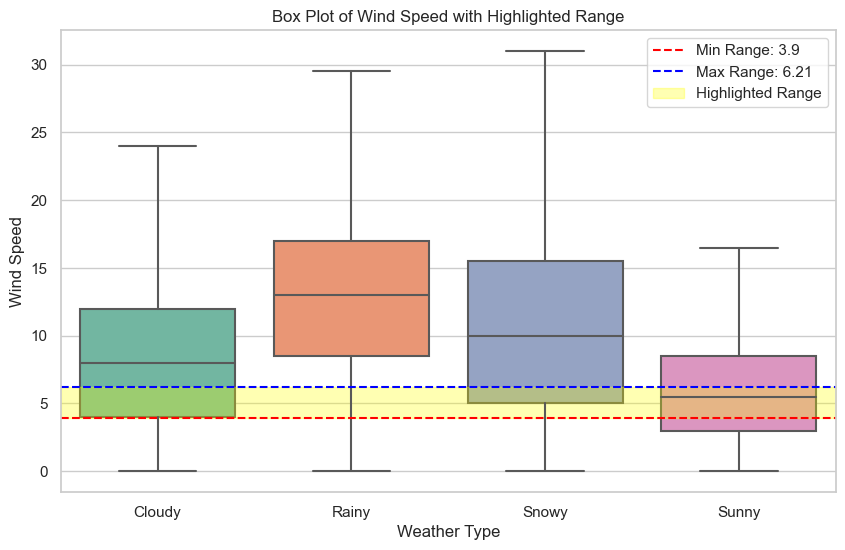

In [72]:
range_min, range_max = 3.9, 6.21

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Weather_Type', y='Wind_Speed', data=train_set_P, palette="Set2", showfliers=False)

# Highlight the range with shaded regions
plt.axhline(y=range_min, color='red', linestyle='--', label=f'Min Range: {range_min}')
plt.axhline(y=range_max, color='blue', linestyle='--', label=f'Max Range: {range_max}')

# Adding shaded region between the range
plt.fill_betweenx(
    y=[range_min, range_max], 
    x1=ax.get_xlim()[0], 
    x2=ax.get_xlim()[1], 
    color='yellow', 
    alpha=0.3, 
    label='Highlighted Range'
)

# Titles and labels
plt.title('Box Plot of Wind Speed with Highlighted Range')
plt.xlabel('Weather Type')
plt.ylabel('Wind Speed')
plt.legend()

# Show plot
plt.show()

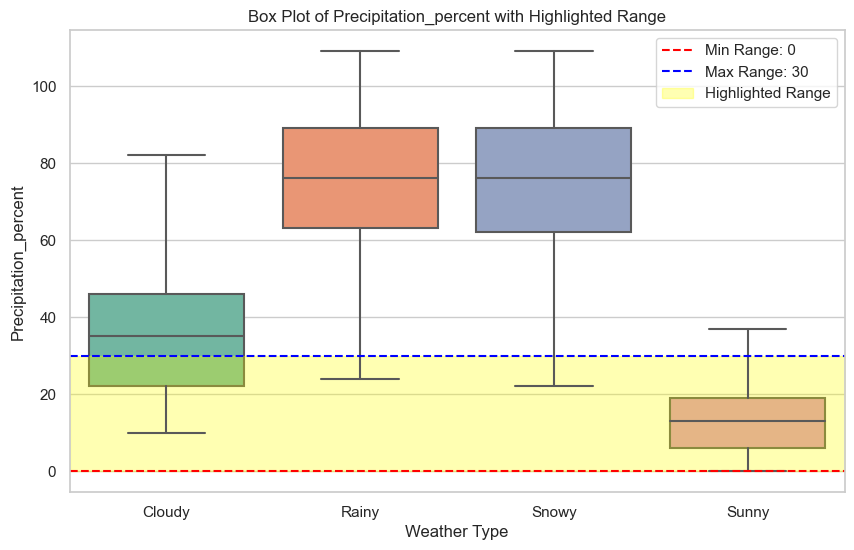

In [76]:
range_min, range_max = 0,30

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Weather_Type', y='Precipitation_percent', data=train_set_P, palette="Set2", showfliers=False)

# Highlight the range with shaded regions
plt.axhline(y=range_min, color='red', linestyle='--', label=f'Min Range: {range_min}')
plt.axhline(y=range_max, color='blue', linestyle='--', label=f'Max Range: {range_max}')

# Adding shaded region between the range
plt.fill_betweenx(
    y=[range_min, range_max], 
    x1=ax.get_xlim()[0], 
    x2=ax.get_xlim()[1], 
    color='yellow', 
    alpha=0.3, 
    label='Highlighted Range'
)

# Titles and labels
plt.title('Box Plot of Precipitation_percent with Highlighted Range')
plt.xlabel('Weather Type')
plt.ylabel('Precipitation_percent')
plt.legend()

# Show plot
plt.show()

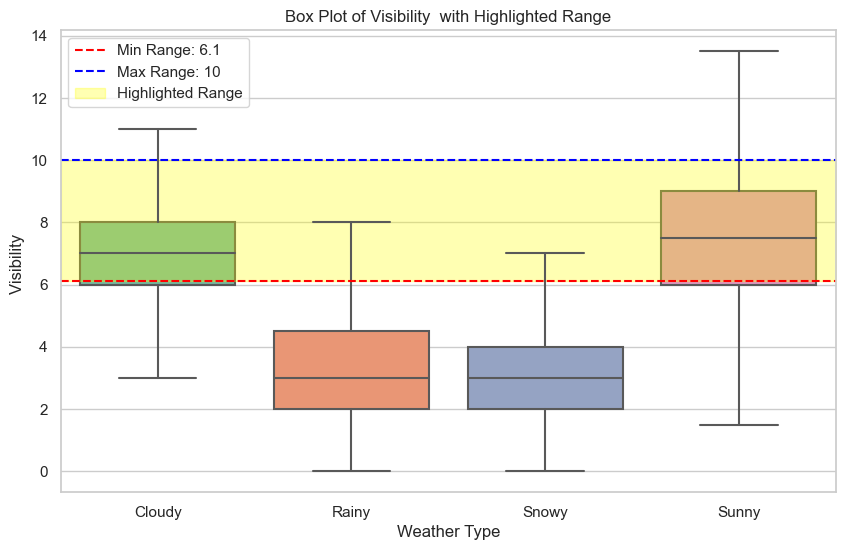

In [77]:
range_min, range_max = 6.1, 10

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Weather_Type', y='Visibility_km', data=train_set_P, palette="Set2", showfliers=False)

# Highlight the range with shaded regions
plt.axhline(y=range_min, color='red', linestyle='--', label=f'Min Range: {range_min}')
plt.axhline(y=range_max, color='blue', linestyle='--', label=f'Max Range: {range_max}')

# Adding shaded region between the range
plt.fill_betweenx(
    y=[range_min, range_max], 
    x1=ax.get_xlim()[0], 
    x2=ax.get_xlim()[1], 
    color='yellow', 
    alpha=0.3, 
    label='Highlighted Range'
)

# Titles and labels
plt.title('Box Plot of Visibility  with Highlighted Range')
plt.xlabel('Weather Type')
plt.ylabel('Visibility ')
plt.legend()

# Show plot
plt.show()

In [ ]:
range_min, range_max = 1000, 1020

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Weather_Type', y='Atmospheric_Pressure', data=train_set_P, palette="Set2", showfliers=False)

# Highlight the range with shaded regions
plt.axhline(y=range_min, color='red', linestyle='--', label=f'Min Range: {range_min}')
plt.axhline(y=range_max, color='blue', linestyle='--', label=f'Max Range: {range_max}')

# Adding shaded region between the range
plt.fill_betweenx(
    y=[range_min, range_max], 
    x1=ax.get_xlim()[0], 
    x2=ax.get_xlim()[1], 
    color='yellow', 
    alpha=0.3, 
    label='Highlighted Range'
)

# Titles and labels
plt.title('Box Plot of Atmospheric_Pressure  with Highlighted Range')
plt.xlabel('Weather Type')
plt.ylabel('Atmospheric_Pressure ')
plt.legend()

# Show plot
plt.show()

In [ ]:
range_min, range_max = 10, 25

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Weather_Type', y='Temperature', data=train_set_P, palette="Set2", showfliers=False)

# Highlight the range with shaded regions
plt.axhline(y=range_min, color='red', linestyle='--', label=f'Min Range: {range_min}')
plt.axhline(y=range_max, color='blue', linestyle='--', label=f'Max Range: {range_max}')

# Adding shaded region between the range
plt.fill_betweenx(
    y=[range_min, range_max], 
    x1=ax.get_xlim()[0], 
    x2=ax.get_xlim()[1], 
    color='yellow', 
    alpha=0.3, 
    label='Highlighted Range'
)

# Titles and labels
plt.title('Box Plot of Temperature  with Highlighted Range')
plt.xlabel('Weather Type')
plt.ylabel('Temperature')
plt.legend()

# Show plot
plt.show()

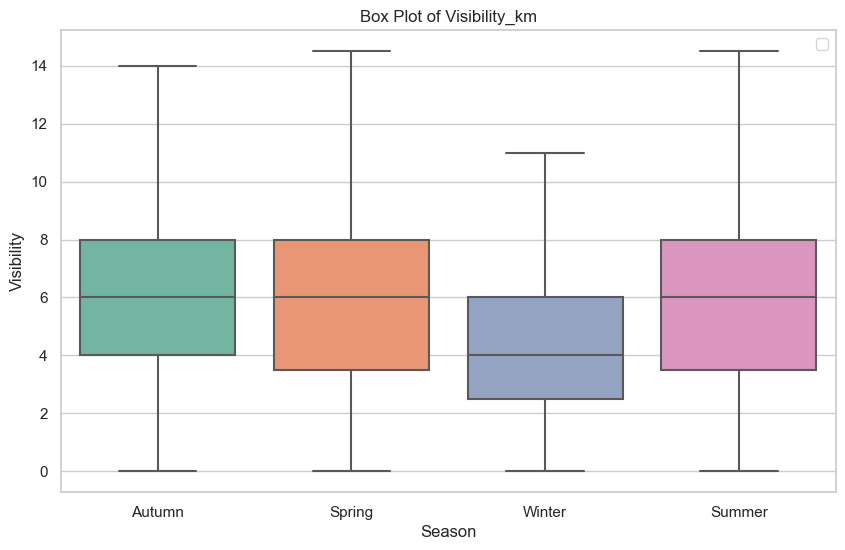

In [78]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Season', y='Visibility_km', data=train_set_P, palette="Set2", showfliers=False)
plt.title('Box Plot of Visibility_km')
plt.xlabel('Season')
plt.ylabel('Visibility')
plt.legend()

# Show plot
plt.show()

In [ ]:
import pandas as pd

# Contingency table for Weather_Type and Season
weather_season_ct = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Season'])

# Contingency table for Weather_Type and Location
weather_location_ct = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Location'])

print("Weather vs. Season Contingency Table:\n", weather_season_ct)
print("\nWeather vs. Location Contingency Table:\n", weather_location_ct)

In [ ]:
from scipy.stats import chi2_contingency

# Chi-Square Test for Weather and Season
chi2_season, p_season, _, _ = chi2_contingency(weather_season_ct)
print(f"Chi-Square Test for Weather vs. Season: chi2 = {chi2_season}, p-value = {p_season}")

# Chi-Square Test for Weather and Location
chi2_location, p_location, _, _ = chi2_contingency(weather_location_ct)
print(f"Chi-Square Test for Weather vs. Location: chi2 = {chi2_location}, p-value = {p_location}")

In [ ]:
weather_season_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Weather Type vs. Season')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.legend(title='Season')
plt.show()

weather_location_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Weather Type vs. Location')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.legend(title='Location')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(weather_season_ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Weather Type vs. Season')
plt.xlabel('Season')
plt.ylabel('Weather Type')
plt.show()

# Heatmap for Weather and Location
plt.figure(figsize=(10, 6))
sns.heatmap(weather_location_ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Weather Type vs. Location')
plt.xlabel('Location')
plt.ylabel('Weather Type')
plt.show()

In [ ]:
contingency_weather_location = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Location'])
contingency_weather_season = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Season'])
contingency_location_season = pd.crosstab(train_set_P['Location'], train_set_P['Season'])

# Display the contingency tables
print("Contingency Table: Weather_Type vs Location\n", contingency_weather_location)
print("Contingency Table: Weather_Type vs Season\n", contingency_weather_season)
print("Contingency Table: Location vs Season\n", contingency_location_season)

In [ ]:
# Chi-Square test for Weather_Type vs Location
chi2_weather_location, p_weather_location, _, _ = chi2_contingency(contingency_weather_location)
print(f"Chi-Square Test for Weather_Type vs Location: chi2 = {chi2_weather_location}, p-value = {p_weather_location}")

# Chi-Square test for Weather_Type vs Season
chi2_weather_season, p_weather_season, _, _ = chi2_contingency(contingency_weather_season)
print(f"Chi-Square Test for Weather_Type vs Season: chi2 = {chi2_weather_season}, p-value = {p_weather_season}")

# Chi-Square test for Location vs Season
chi2_location_season, p_location_season, _, _ = chi2_contingency(contingency_location_season)
print(f"Chi-Square Test for Location vs Season: chi2 = {chi2_location_season}, p-value = {p_location_season}")

In [ ]:
contingency_table = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Location'])
print(contingency_table)

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Convert expected frequencies to a DataFrame for easy comparison
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df)

In [ ]:
residuals = contingency_table - expected_df
print(residuals)


In [ ]:
rainy_inland_observed = contingency_table.loc['Rainy', 'inland']
rainy_inland_expected = expected_df.loc['Rainy', 'inland']
rainy_inland_residual = residuals.loc['Rainy', 'inland']

print(f"Observed: {rainy_inland_observed}, Expected: {rainy_inland_expected}, Residual: {rainy_inland_residual}")

In [ ]:
# Create contingency tables
weather_location_ct = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Location'])
weather_season_ct = pd.crosstab(train_set_P['Weather_Type'], train_set_P['Season'])

# Perform the Chi-Square test for Weather_Type vs Location
chi2_loc, p_loc, dof_loc, expected_loc = chi2_contingency(weather_location_ct)

# Perform the Chi-Square test for Weather_Type vs Season
chi2_season, p_season, dof_season, expected_season = chi2_contingency(weather_season_ct)

# Calculate the contribution of each cell to the overall Chi-Square statistic (observed - expected)^2 / expected
contrib_loc = (weather_location_ct - expected_loc) ** 2 / expected_loc
contrib_season = (weather_season_ct - expected_season) ** 2 / expected_season

# Significance threshold based on Chi-Square distribution
significance_threshold = chi2_contingency(weather_location_ct)[0] / weather_location_ct.size

# Find significant associations for Weather_Type vs Location
print("Significant Associations between Weather_Type and Location:")
for weather_type in contrib_loc.index:
    for location in contrib_loc.columns:
        if contrib_loc.loc[weather_type, location] > significance_threshold:
            print(f"Significant association: {weather_type} and {location} (Contribution = {contrib_loc.loc[weather_type, location]:.2f})")

# Find significant associations for Weather_Type vs Season
print("\nSignificant Associations between Weather_Type and Season:")
for weather_type in contrib_season.index:
    for season in contrib_season.columns:
        if contrib_season.loc[weather_type, season] > significance_threshold:
            print(f"Significant association: {weather_type} and {season} (Contribution = {contrib_season.loc[weather_type, season]:.2f})")

In [ ]:
data = pd.crosstab(train_set_P['Location'], train_set_P['Weather_Type'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(data)

# Calculate standardized residuals
residuals = (data - expected) / np.sqrt(expected)

# Create a network graph
G = nx.Graph()

# Add nodes for each level
levels = list(data.index) + list(data.columns)
for level in levels:
    G.add_node(level)

# Add edges based on the residuals (only adding significant associations)
threshold = 2  # Example threshold for significance
for i, row in enumerate(data.index):
    for j, col in enumerate(data.columns):
        if abs(residuals.iloc[i, j]) > threshold:
            G.add_edge(row, col, weight=abs(residuals.iloc[i, j]))

# Draw the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges])
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Network Plot of Significant Associations Between Levels")
plt.show()

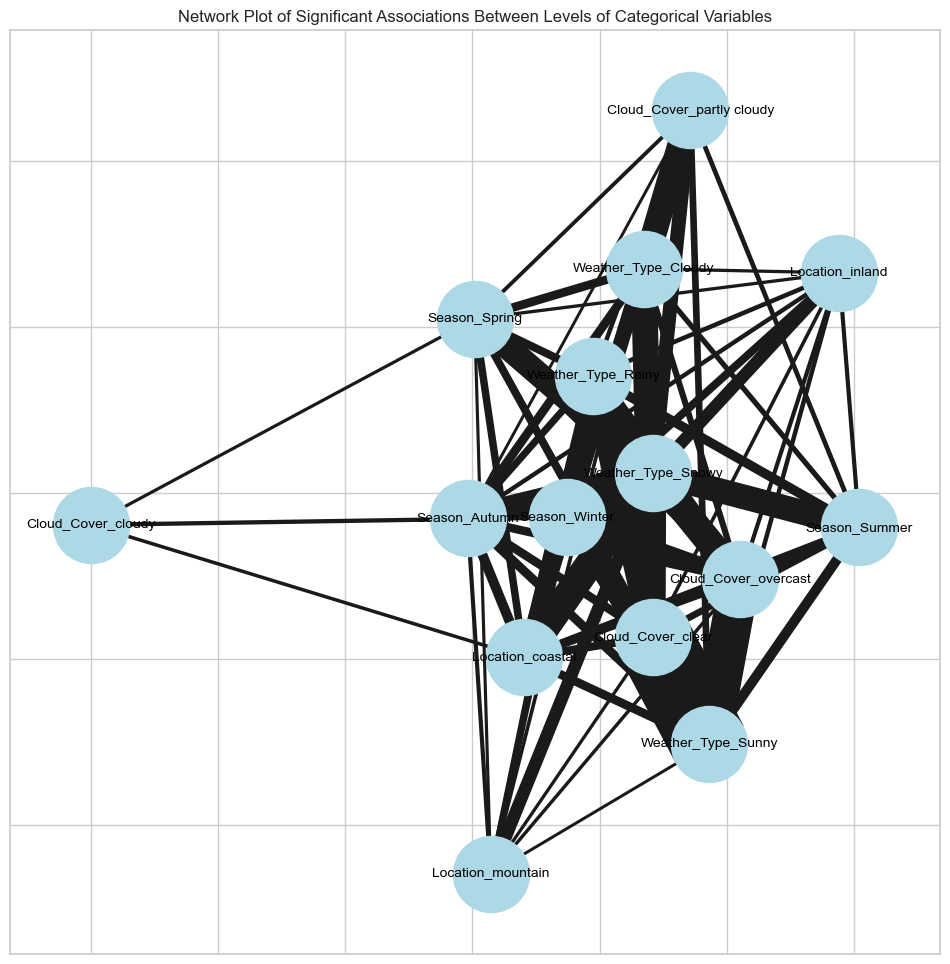

In [79]:
variables = ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']
G = nx.Graph()

# Create nodes for each level in all variables
for var in variables:
    levels = train_set_P[var].unique()
    for level in levels:
        G.add_node(f"{var}_{level}", label=level)

# Add edges based on Chi-Square test residuals
threshold = 2  # Example threshold for significance

for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        # Create a contingency table
        ct = pd.crosstab(train_set_P[var1], train_set_P[var2])
        
        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(ct)
        
        # Calculate standardized residuals
        residuals = (ct - expected) / np.sqrt(expected)
        
        # Add edges for significant associations
        for level1 in ct.index:
            for level2 in ct.columns:
                if abs(residuals.loc[level1, level2]) > threshold:
                    G.add_edge(f"{var1}_{level1}", f"{var2}_{level2}", weight=abs(residuals.loc[level1, level2]))

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges])
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title("Network Plot of Significant Associations Between Levels of Categorical Variables")
plt.show()

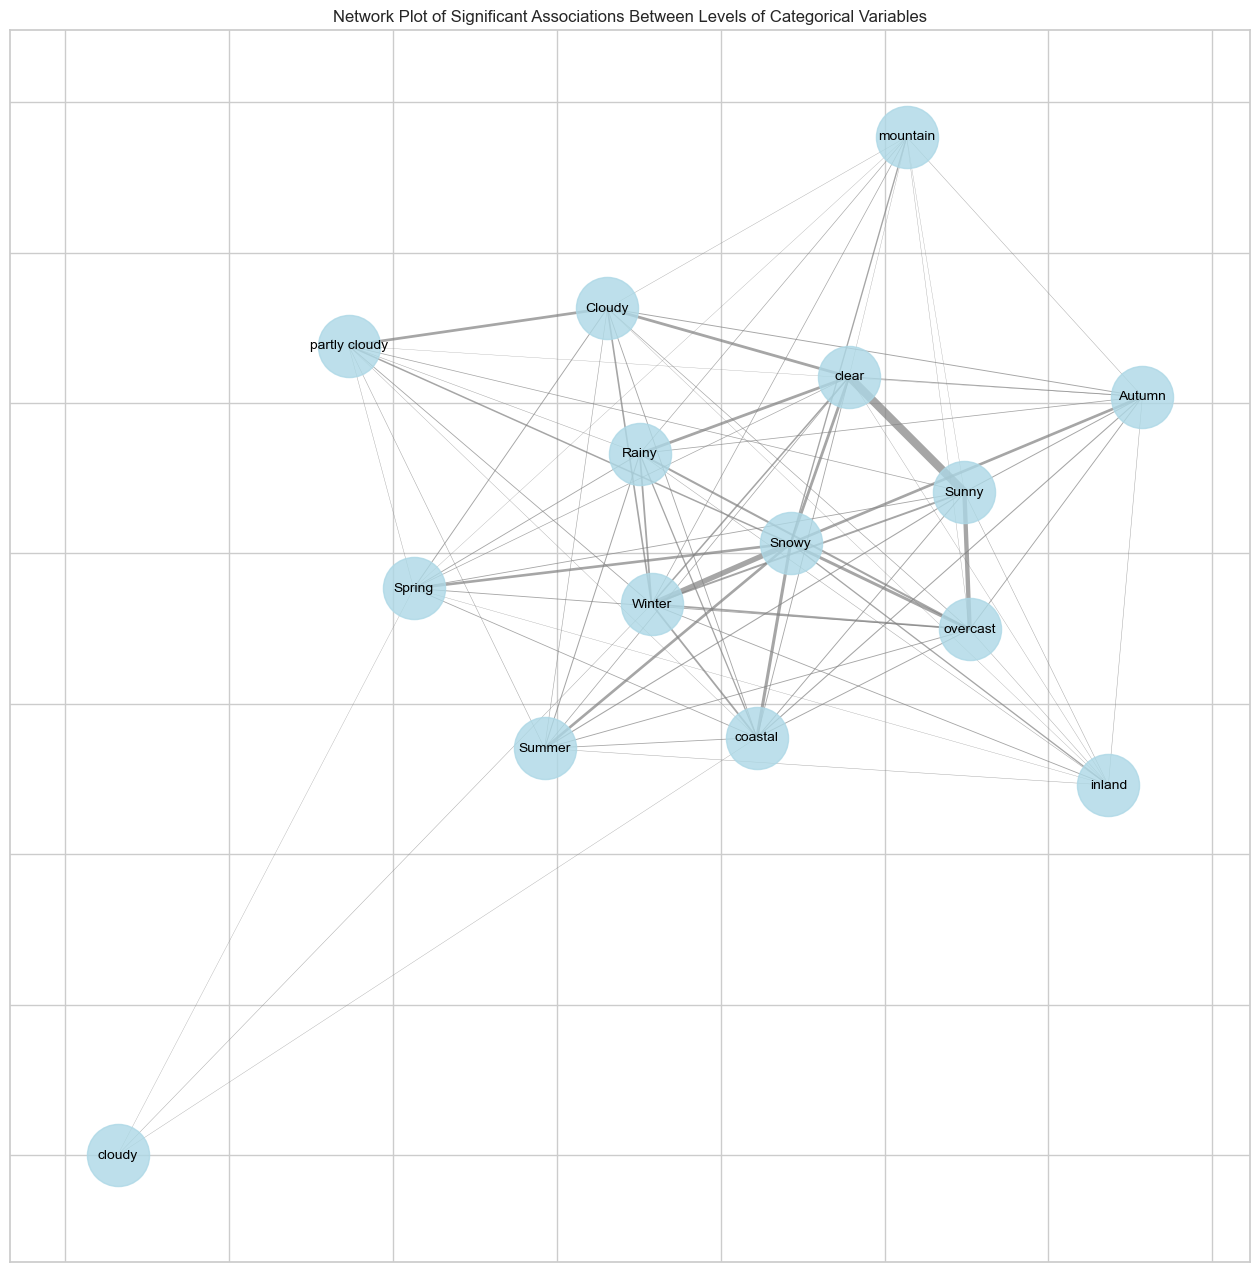

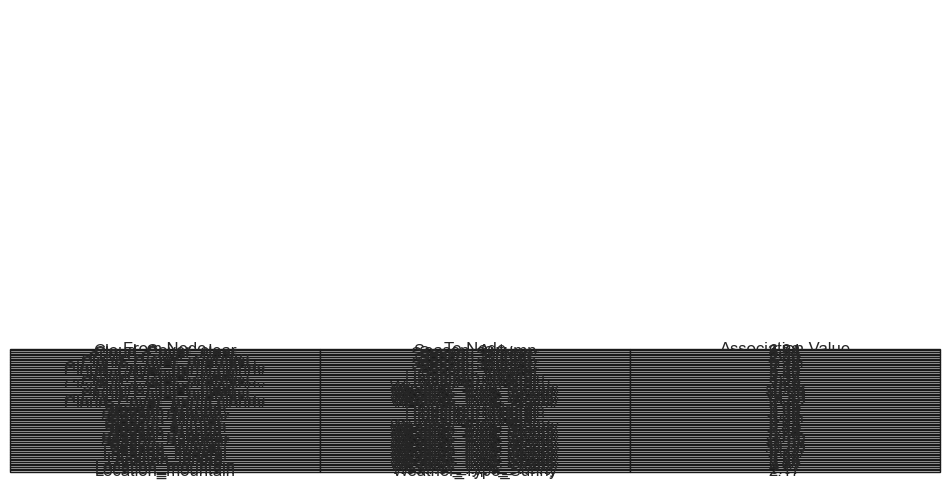

In [80]:
variables = ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']
G = nx.Graph()

# Create nodes for each level in all variables
for var in variables:
    levels = train_set_P[var].unique()
    for level in levels:
        G.add_node(f"{var}_{level}", label=level)

# Add edges based on Chi-Square test residuals
threshold = 2  # Example threshold for significance

edges = []
edge_weights = []

for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        # Create a contingency table
        ct = pd.crosstab(train_set_P[var1], train_set_P[var2])
        
        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(ct)
        
        # Calculate standardized residuals
        residuals = (ct - expected) / np.sqrt(expected)
        
        # Add edges for significant associations
        for level1 in ct.index:
            for level2 in ct.columns:
                if abs(residuals.loc[level1, level2]) > threshold:
                    edge = (f"{var1}_{level1}", f"{var2}_{level2}")
                    weight = abs(residuals.loc[level1, level2])
                    edges.append(edge)
                    edge_weights.append(weight)

# Add edges to the graph with weights
for edge, weight in zip(edges, edge_weights):
    G.add_edge(edge[0], edge[1], weight=weight)

# Draw the network
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G, seed=42, k=0.6, iterations=100)  # Adjust k and iterations for better spacing

# Draw network nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.8)

# Draw network edges with varying widths
max_weight = max(edge_weights)
edge_widths = [G[u][v]['weight'] / max_weight * 6 for u, v in G.edges]  # Scale edge width for better visibility
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, edge_color='grey')

# Draw node labels with small font size
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')

plt.title("Network Plot of Significant Associations Between Levels of Categorical Variables")

# Create a table of associations
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table_data = []
for edge, weight in zip(edges, edge_weights):
    table_data.append([edge[0], edge[1], round(weight, 2)])
columns = ['From Node', 'To Node', 'Association Value']
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, -0.5, 1, 0.4])

plt.show()

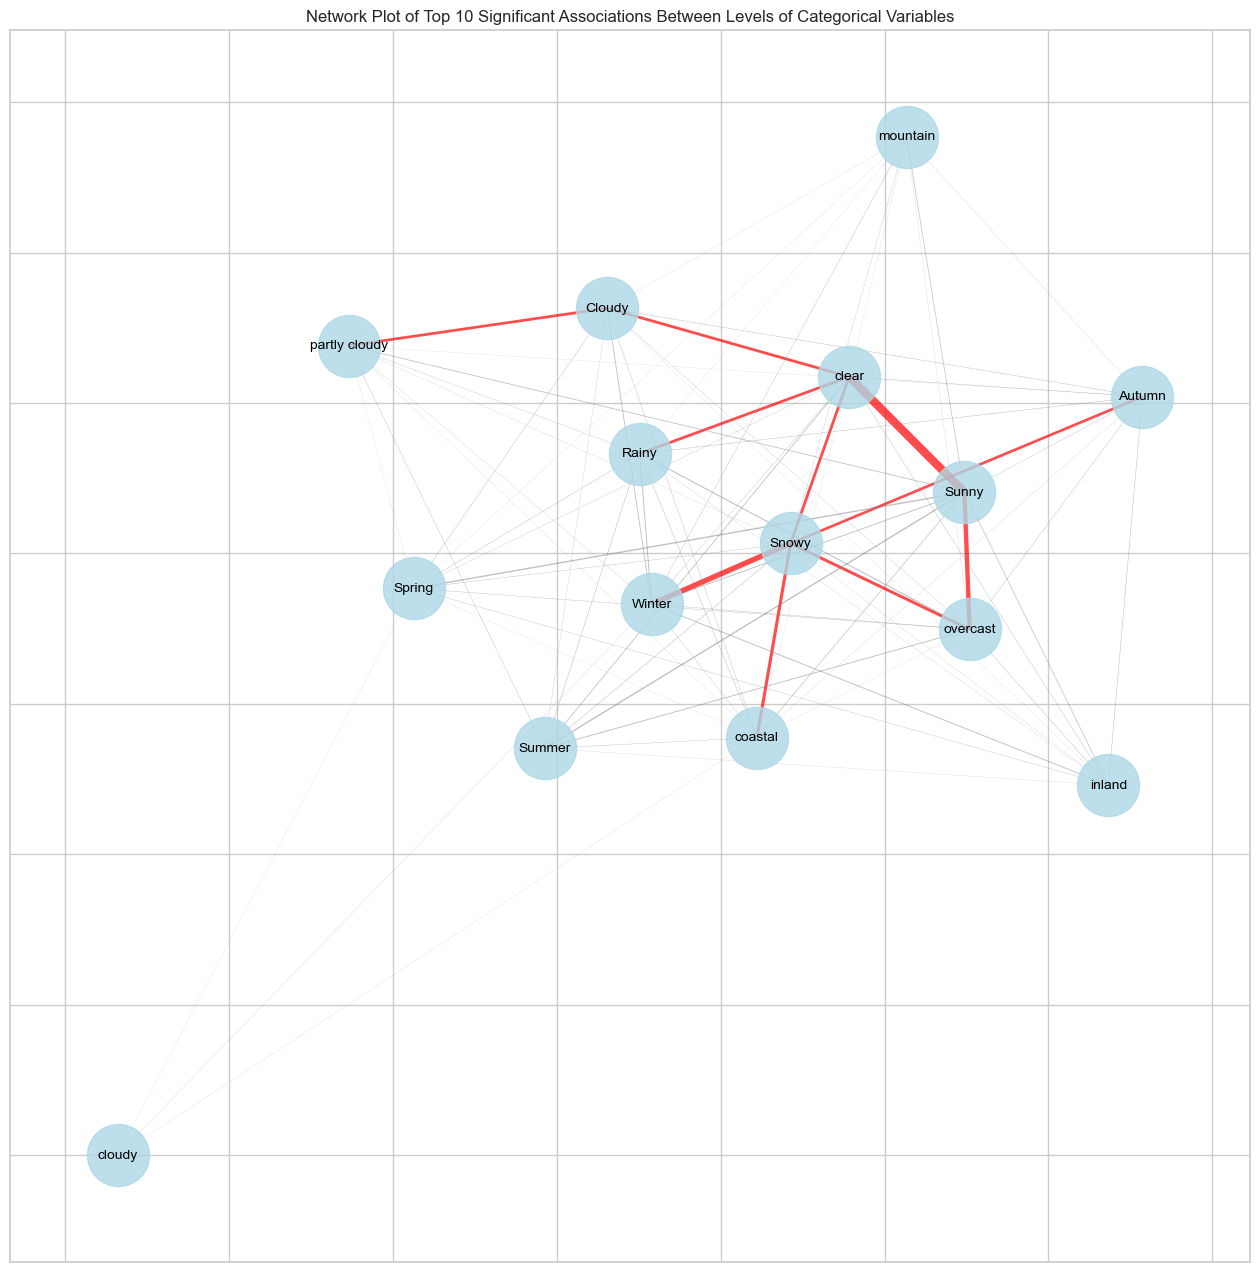

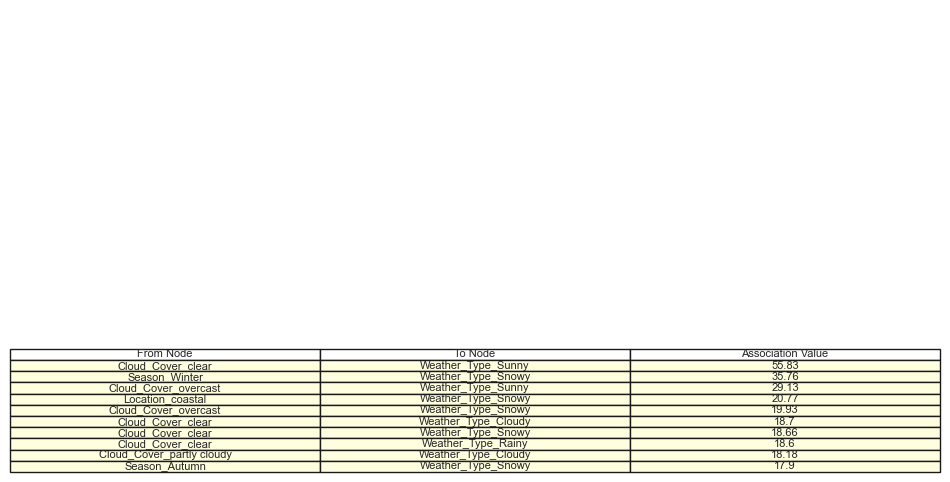

In [81]:
variables = ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']
G = nx.Graph()

# Create nodes for each level in all variables
for var in variables:
    levels = train_set_P[var].unique()
    for level in levels:
        G.add_node(f"{var}_{level}", label=level)

# Add edges based on Chi-Square test residuals
threshold = 2  # Example threshold for significance

edges = []
edge_weights = []

for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        # Create a contingency table
        ct = pd.crosstab(train_set_P[var1], train_set_P[var2])
        
        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(ct)
        
        # Calculate standardized residuals
        residuals = (ct - expected) / np.sqrt(expected)
        
        # Add edges for significant associations
        for level1 in ct.index:
            for level2 in ct.columns:
                if abs(residuals.loc[level1, level2]) > threshold:
                    edge = (f"{var1}_{level1}", f"{var2}_{level2}")
                    weight = abs(residuals.loc[level1, level2])
                    edges.append(edge)
                    edge_weights.append(weight)

# Add edges to the graph with weights
for edge, weight in zip(edges, edge_weights):
    G.add_edge(edge[0], edge[1], weight=weight)

# Sort edges by weight and select top 10
top_edges = sorted(zip(edges, edge_weights), key=lambda x: x[1], reverse=True)[:10]

# Draw the network
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G, seed=42, k=0.6, iterations=100)  # Adjust k and iterations for better spacing

# Draw network nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.8)

# Draw network edges with varying widths
max_weight = max(edge_weights)
top_edge_weights = [weight for _, weight in top_edges]
edge_widths = [weight / max_weight * 6 for weight in top_edge_weights]
top_edges_dict = dict(top_edges)

# Draw edges for top associations with a different color
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge, _ in top_edges], width=edge_widths, alpha=0.7, edge_color='red')

# Draw edges for other associations
other_edges = [edge for edge in G.edges if edge not in [edge for edge, _ in top_edges]]
other_edge_weights = [G[u][v]['weight'] for u in G.nodes for v in G.nodes if (u, v) in other_edges]
other_edge_widths = [weight / max_weight * 3 for weight in other_edge_weights]
nx.draw_networkx_edges(G, pos, edgelist=other_edges, width=other_edge_widths, alpha=0.5, edge_color='grey')

# Draw node labels with small font size
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')

plt.title("Network Plot of Top 10 Significant Associations Between Levels of Categorical Variables")

# Create a table of the top 10 associations
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table_data = [[edge[0], edge[1], round(weight, 2)] for edge, weight in top_edges]
columns = ['From Node', 'To Node', 'Association Value']
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, -0.5, 1, 0.4], cellColours=[['lightyellow']*3]*len(table_data))

# Adjust font size for the table
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

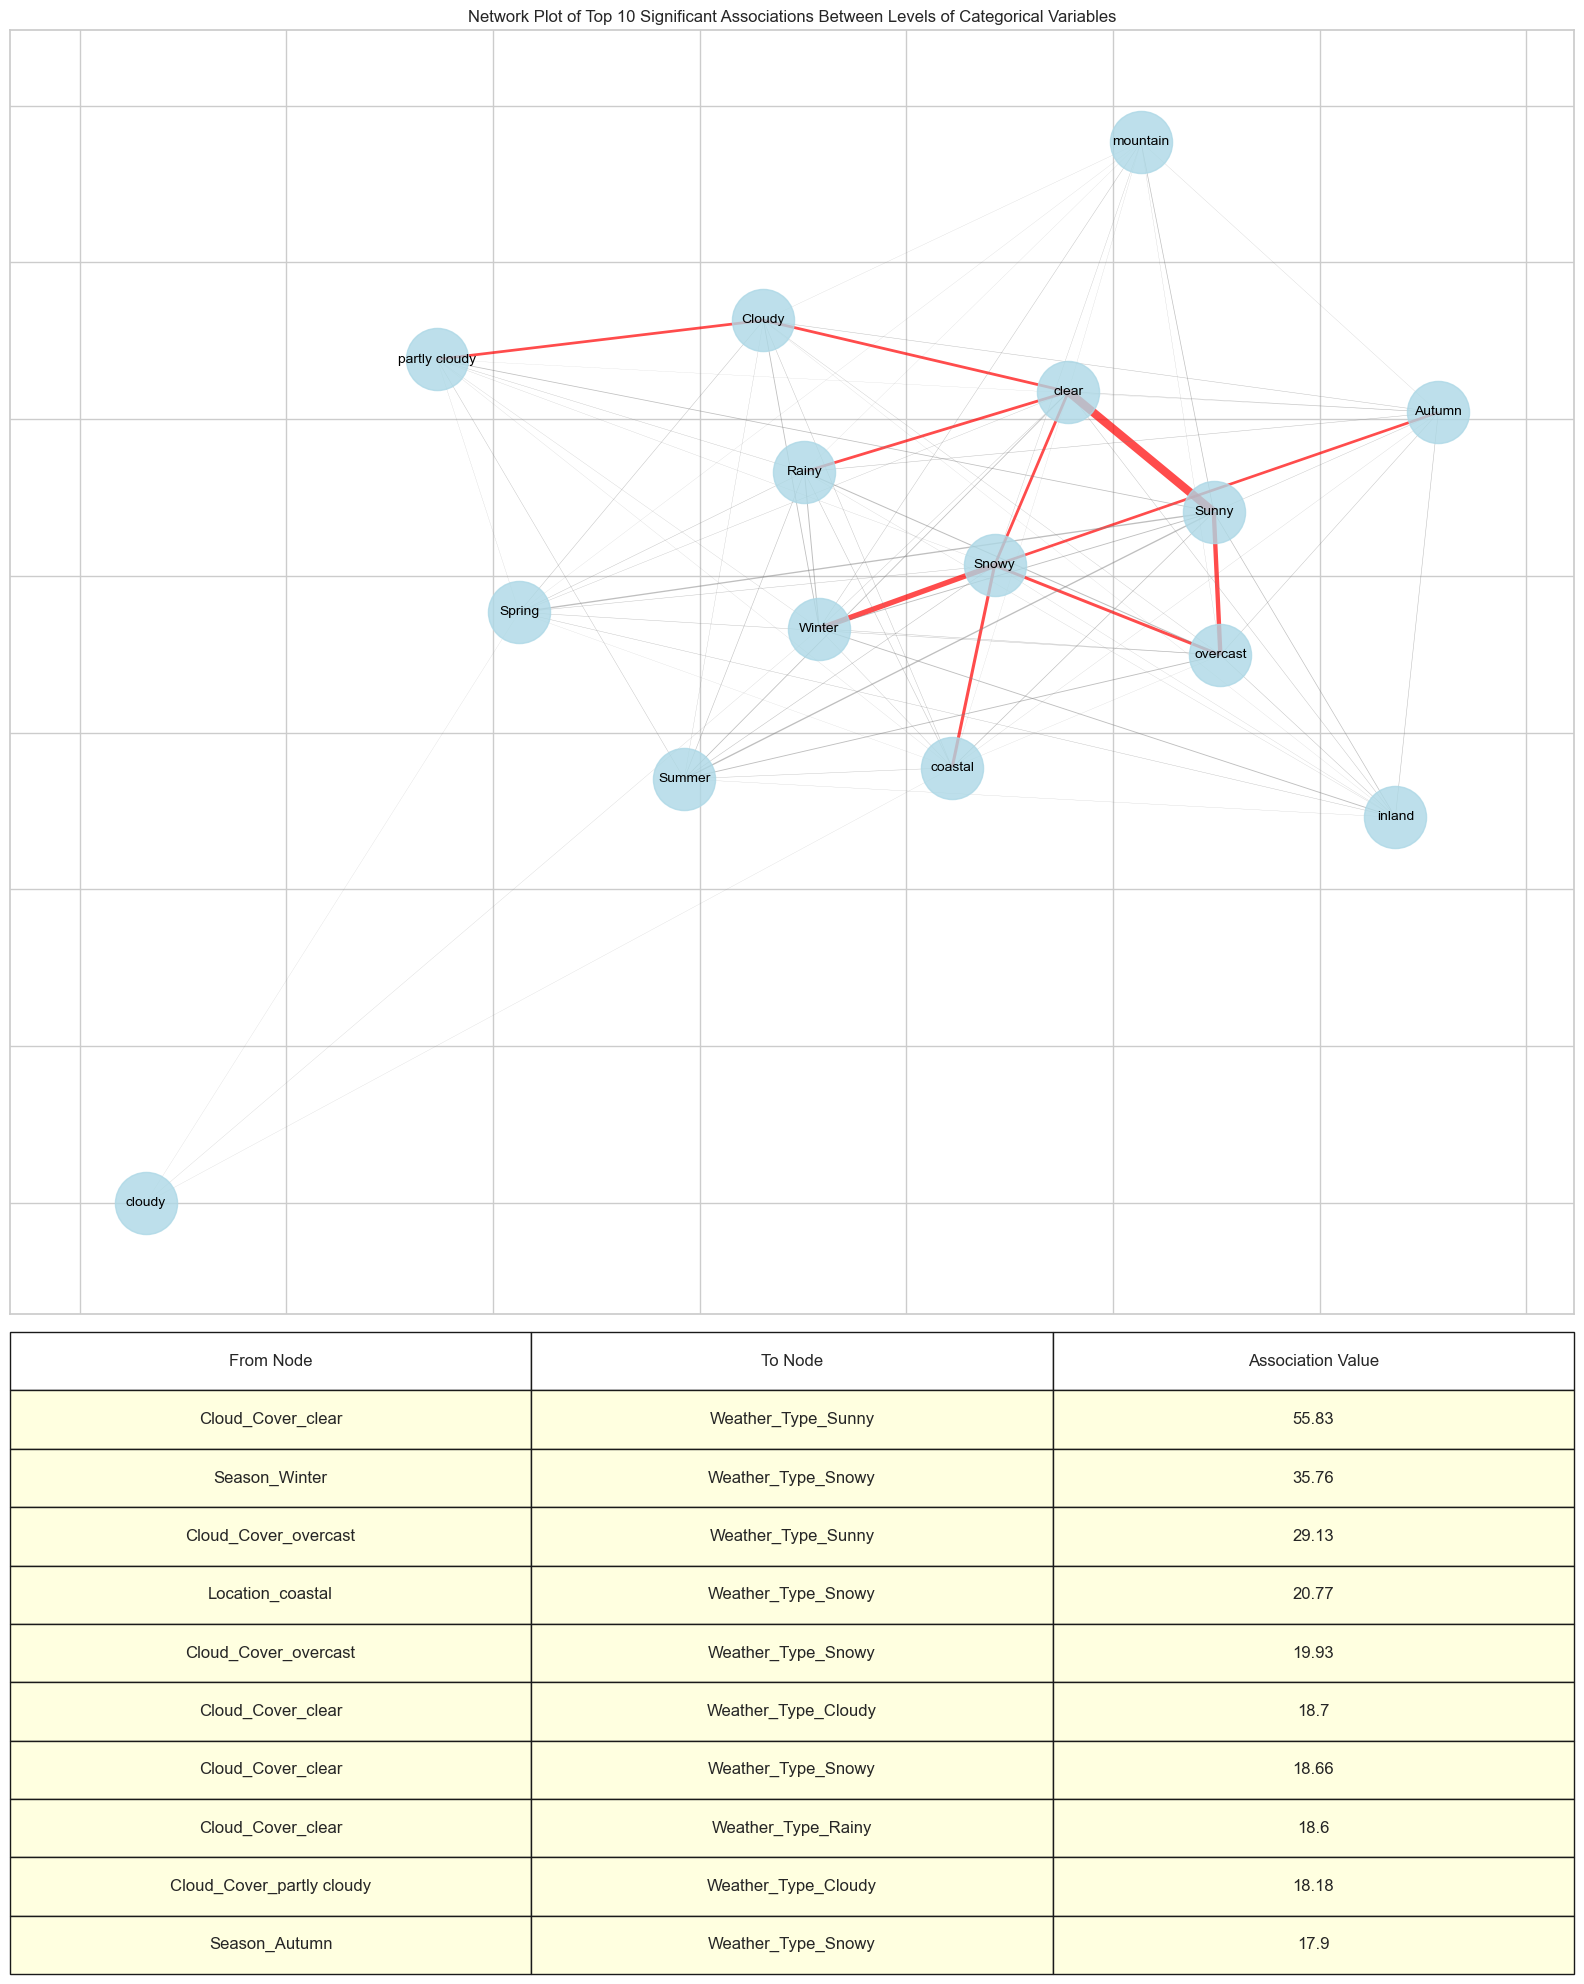

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import chi2_contingency
import numpy as np

variables = ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']
G = nx.Graph()

# Create nodes for each level in all variables
for var in variables:
    levels = train_set_P[var].unique()
    for level in levels:
        G.add_node(f"{var}_{level}", label=level)

# Add edges based on Chi-Square test residuals
threshold = 2  # Example threshold for significance

edges = []
edge_weights = []

for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        # Create a contingency table
        ct = pd.crosstab(train_set_P[var1], train_set_P[var2])
        
        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(ct)
        
        # Calculate standardized residuals
        residuals = (ct - expected) / np.sqrt(expected)
        
        # Add edges for significant associations
        for level1 in ct.index:
            for level2 in ct.columns:
                if abs(residuals.loc[level1, level2]) > threshold:
                    edge = (f"{var1}_{level1}", f"{var2}_{level2}")
                    weight = abs(residuals.loc[level1, level2])
                    edges.append(edge)
                    edge_weights.append(weight)

# Add edges to the graph with weights
for edge, weight in zip(edges, edge_weights):
    G.add_edge(edge[0], edge[1], weight=weight)

# Sort edges by weight and select top 10
top_edges = sorted(zip(edges, edge_weights), key=lambda x: x[1], reverse=True)[:10]

# Create the combined figure
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 20), gridspec_kw={'height_ratios': [2, 1]})

# Plot the network
pos = nx.spring_layout(G, seed=42, k=0.6, iterations=100)  # Adjust k and iterations for better spacing

# Draw network nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.8, ax=ax1)

# Draw network edges with varying widths
max_weight = max(edge_weights)
top_edge_weights = [weight for _, weight in top_edges]
edge_widths = [weight / max_weight * 6 for weight in top_edge_weights]

# Draw edges for top associations with a different color
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge, _ in top_edges], width=edge_widths, alpha=0.7, edge_color='red', ax=ax1)

# Draw edges for other associations
other_edges = [edge for edge in G.edges if edge not in [edge for edge, _ in top_edges]]
other_edge_weights = [G[u][v]['weight'] for u in G.nodes for v in G.nodes if (u, v) in other_edges]
other_edge_widths = [weight / max_weight * 3 for weight in other_edge_weights]
nx.draw_networkx_edges(G, pos, edgelist=other_edges, width=other_edge_widths, alpha=0.5, edge_color='grey', ax=ax1)

# Draw node labels with small font size
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black', ax=ax1)

ax1.set_title("Network Plot of Top 10 Significant Associations Between Levels of Categorical Variables")

# Create a table of the top 10 associations
table_data = [[edge[0], edge[1], round(weight, 2)] for edge, weight in top_edges]
columns = ['From Node', 'To Node', 'Association Value']
table_df = pd.DataFrame(table_data, columns=columns)

# Plot and adjust the table
table_plot = ax2.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1], cellColours=[['lightyellow']*3]*len(table_data))

# Style the table
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(12)
table_plot.scale(1.5, 1.5)  # Scale the table to make it larger

# Hide the axis
ax2.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
variables = ['Cloud_Cover', 'Season', 'Location', 'Weather_Type']
G = nx.Graph()

# Create nodes for each level in all variables
for var in variables:
    levels = train_set_P[var].unique()
    for level in levels:
        G.add_node(f"{var}_{level}", label=level)

# Add edges based on Chi-Square test residuals
threshold = 2  # Example threshold for significance

edges = []
edge_weights = []

for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        # Create a contingency table
        ct = pd.crosstab(train_set_P[var1], train_set_P[var2])
        
        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(ct)
        
        # Calculate standardized residuals
        residuals = (ct - expected) / np.sqrt(expected)
        
        # Add edges for significant associations
        for level1 in ct.index:
            for level2 in ct.columns:
                if abs(residuals.loc[level1, level2]) > threshold:
                    edge = (f"{var1}_{level1}", f"{var2}_{level2}")
                    weight = abs(residuals.loc[level1, level2])
                    edges.append(edge)
                    edge_weights.append(weight)

# Add edges to the graph with weights
for edge, weight in zip(edges, edge_weights):
    G.add_edge(edge[0], edge[1], weight=weight)

# Sort edges by weight and select top 10
top_edges = sorted(zip(edges, edge_weights), key=lambda x: x[1], reverse=True)[:10]

# 3D Plot
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Draw network nodes
pos = nx.spring_layout(G, seed=42, k=0.6, iterations=100)
x_values = [pos[node][0] for node in G.nodes()]
y_values = [pos[node][1] for node in G.nodes()]
z_values = np.random.uniform(-1, 1, len(G.nodes()))  # Random Z values for 3D

ax.scatter(x_values, y_values, z_values, c='lightblue', s=2000, alpha=0.8, edgecolor='k')

# Draw edges with varying widths
max_weight = max(edge_weights)
top_edge_weights = [weight for _, weight in top_edges]
edge_widths = [weight / max_weight * 6 for weight in top_edge_weights]
top_edges_dict = dict(top_edges)

for edge, weight in top_edges:
    start, end = edge
    x_values_edge = [pos[start][0], pos[end][0]]
    y_values_edge = [pos[start][1], pos[end][1]]
    z_values_edge = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]  # Random Z values for 3D edges
    ax.plot(x_values_edge, y_values_edge, z_values_edge, 'r-', linewidth=weight / max_weight * 6)

# Draw other edges
other_edges = [edge for edge in G.edges if edge not in [edge for edge, _ in top_edges]]
for edge in other_edges:
    start, end = edge
    x_values_edge = [pos[start][0], pos[end][0]]
    y_values_edge = [pos[start][1], pos[end][1]]
    z_values_edge = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]  # Random Z values for 3D edges
    ax.plot(x_values_edge, y_values_edge, z_values_edge, 'grey', linewidth=weight / max_weight * 3)

# Draw node labels with small font size
for node in G.nodes():
    ax.text(pos[node][0], pos[node][1], np.random.uniform(-1, 1), s=G.nodes[node]['label'], fontsize=10, ha='center')

ax.set_title("3D Network Plot of Top 10 Significant Associations Between Levels of Categorical Variables")
plt.show()

# Create a table of the top 10 associations
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table_data = [[edge[0], edge[1], round(weight, 2)] for edge, weight in top_edges]
columns = ['From Node', 'To Node', 'Association Value']
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center', bbox=[0, -0.5, 1, 0.4], cellColours=[['lightyellow']*3]*len(table_data))

# Adjust font size for the table
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

In [ ]:
numerical_columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_percent',
       'Atmospheric_Pressure', 'UV_Index', 'Visibility_km']  
# Calculate the correlation matrix
corr_matrix = train_set_e[numerical_columns].corr()

# Create a mesh grid for the 3D plot
x = np.arange(len(corr_matrix.columns))
y = np.arange(len(corr_matrix.columns))
x, y = np.meshgrid(x, y)
z = corr_matrix.values

# Create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='none')

# Add labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_yticklabels(corr_matrix.columns)
ax.set_zlabel('Correlation')
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')
ax.set_title('3D Surface Plot of Correlation Matrix')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
import plotly.express as px

fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='RdBu_r', title='Interactive Correlation Heatmap')
fig.update_xaxes(side="bottom")
fig.show()